<h1 style="text-align: center; font-weight: bold; text-decoration: underline;">Importing Necessary Libraries</h1>

In [1]:
import numpy as np
import pandas as pd
import os
import imagehash
from PIL import Image
from skimage import data, img_as_float
from sklearn.utils import resample
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objects as go
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import warnings; warnings.filterwarnings("ignore", category=UserWarning, module="tensorflow")

<h1 style="text-align: center; font-weight: bold; text-decoration: underline;">Defining the Path</h1>

In [8]:
# Set the paths to the 'train' and 'test' directories
train_dir = r'E:\datasets\melanoma_cancer_dataset\train'
test_dir = r'E:\datasets\melanoma_cancer_dataset\test'

# Define paths to the directories containing benign and malignant images
benign_train_dir = r'E:\datasets\melanoma_cancer_dataset\train\benign'
malignant_train_dir = r'E:\datasets\melanoma_cancer_dataset\train\malignant'
benign_test_dir = r'E:\datasets\melanoma_cancer_dataset\test\benign'
malignant_test_dir = r'E:\datasets\melanoma_cancer_dataset\test\malignant'

# Checking the number of images in each category (benign and malignant)
benign_train = len(os.listdir(train_dir + r'\benign'))
malignant_train = len(os.listdir(train_dir + r'\malignant'))
benign_test = len(os.listdir(test_dir + r'\benign'))
malignant_test = len(os.listdir(test_dir + r'\malignant'))

<h1 style="text-align: center; font-weight: bold; text-decoration: underline;">Class Visualization</h1>

- #### **This clearly explains about classes in both Training and Testing Datasets**

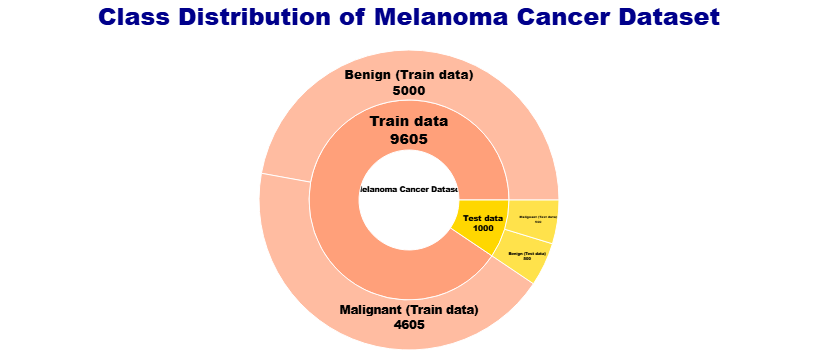

In [61]:
import plotly.graph_objects as go
# Sample data for class distribution
class_labels = [
    'Melanoma Cancer Dataset',
    'Train data',
    'Test data',
    'Benign (Train data)',
    'Malignant (Train data)',
    'Benign (Test data)',
    'Malignant (Test data)'
]
class_parents = [
    '',  # No parent for the top-level
    'Melanoma Cancer Dataset',  # Train
    'Melanoma Cancer Dataset',  # Test
    'Train data',  # Benign (Train)
    'Train data',  # Malignant (Train)
    'Test data',   # Benign (Test)
    'Test data'    # Malignant (Test)
]
class_counts = [
    None,  # Total count not needed for the top-level
    9605,  # Train total
    1000,  # Test total
    5000,  # Benign (Train)
    4605,  # Malignant (Train)
    500,   # Benign (Test)
    500    # Malignant (Test)
]

# Create the sunburst chart
fig = go.Figure(go.Sunburst(
    labels=class_labels,
    parents=class_parents,
    values=class_counts,
    branchvalues="total",
    textinfo="label+value",
    insidetextorientation='horizontal',  # Ensure text orientation is horizontal
    textfont=dict(size=18, color='black', family="Arial Black"),  # Increase font size, boldness, and color for readability
    leaf=dict(opacity=0.7)  # Makes leaf layers smaller to give more space to the center circle
))

# Custom colors to make layers visually distinct
custom_colors = [
    '#FFA07A',  # Melanoma Cancer Dataset - light salmon
    '#FFD700',  # Train - gold
    '#20B2AA',  # Test - light sea green
    '#FF6347',  # Benign (Train) - tomato
    '#4682B4',  # Malignant (Train) - steel blue
    '#9370DB',  # Benign (Test) - medium purple
    '#FF4500'   # Malignant (Test) - orange red
]

# Update layout for enhanced readability of inner circle text
fig.update_layout(
    margin=dict(t=50, l=0, r=0, b=10),
    height=400,  # Increase height to give more space for center text
    title=dict(
        text="Class Distribution of Melanoma Cancer Dataset",
        font=dict(size=24, color='darkblue', family="Arial Black"),
        x=0.5,
        xanchor='center',
    ),
    sunburstcolorway=custom_colors  # Set custom color palette
)

# Center-align and bolden the text for the top-level "Melanoma Cancer Dataset" label
fig.update_traces(
    selector=dict(labels=['Melanoma Cancer Dataset']),
    textfont=dict(size=22, color='darkblue', family="Arial Black")  # Larger, bold, dark color text
)

# Show the chart
fig.show()

- ### **Insights:**
  #### **This clearly explains** 
- #### **Benign (Train): 5000**
- #### **Malignant (Train): 4605**
- #### **Benign (Test): 500**
- #### **Malignant (Test): 500**

<h1 style="text-align: center; font-weight: bold; text-decoration: underline;">Visualizing Some Sample Images</h1>

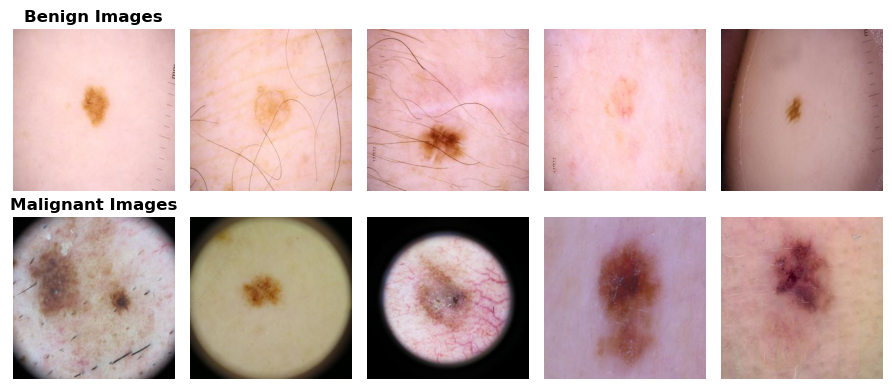

In [63]:
from PIL import Image  
# Function to load images from a directory
def load_images_from_folder(folder, num_images=5):
    images = []
    for i, filename in enumerate(os.listdir(folder)):
        if i >= num_images:  # Only load a few images for display
            break
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path)
        images.append(img)
    return images

# Load a few sample images from both benign and malignant classes
benign_images = load_images_from_folder(benign_train_dir, num_images=5)
malignant_images = load_images_from_folder(malignant_train_dir, num_images=5)

# Display the loaded images
plt.figure(figsize=(9, 4))

# Display benign images
plt.subplot(2, 5, 1)
plt.title('Benign Images', fontweight='bold')
for i, img in enumerate(benign_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')

# Display malignant images
plt.subplot(2, 5, 6)
plt.title('Malignant Images',fontweight='bold')
for i, img in enumerate(malignant_images):
    plt.subplot(2, 5, i + 6)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Identification of Duplicate Images</h2>

- #### **This step is for finding duplicates in the image dataset to help with further analysis.**

In [65]:
def find_duplicates(image_dir):
    """Finds and prints duplicate images within a directory."""
    image_hashes = {}  # Store image hashes
    duplicates = []     # Store duplicate image paths

    for filename in os.listdir(image_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            img_path = os.path.join(image_dir, filename)
            try:
                with Image.open(img_path) as img:
                    hash = imagehash.phash(img)  # Calculate perceptual hash
                    if hash in image_hashes:
                        duplicates.append((image_hashes[hash], img_path))  # Store duplicate
                    else:
                        image_hashes[hash] = img_path  # Store unique hash
            except Exception as e:
                print(f"Error processing image: {img_path}, error: {e}")

    return duplicates

# --- Run duplicate detection ---
datasets = [
    (benign_train_dir, "train_benign"),
    (malignant_train_dir, "train_malignant"),
    (benign_test_dir, "test_benign"),
    (malignant_test_dir, "test_malignant")
]

for dataset_path, dataset_name in datasets:
    duplicates = find_duplicates(dataset_path)
    duplicate_count = len(duplicates)
    print(f"Number of duplicate images in {dataset_name}: {duplicate_count}")

Number of duplicate images in train_benign: 8
Number of duplicate images in train_malignant: 18
Number of duplicate images in test_benign: 1
Number of duplicate images in test_malignant: 0


### **Insights**
- ##### **Identified 26 Duplicate Images from the Training Dataset where **8** Images are from Benign and 18 Images are from Malignant**
- ##### **Identified only 1 Duplicate Image from Testing Dataset which is from Benign**

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Comparative Display of Original and Duplicate Images</h2>

Number of duplicate images in train_benign: 8


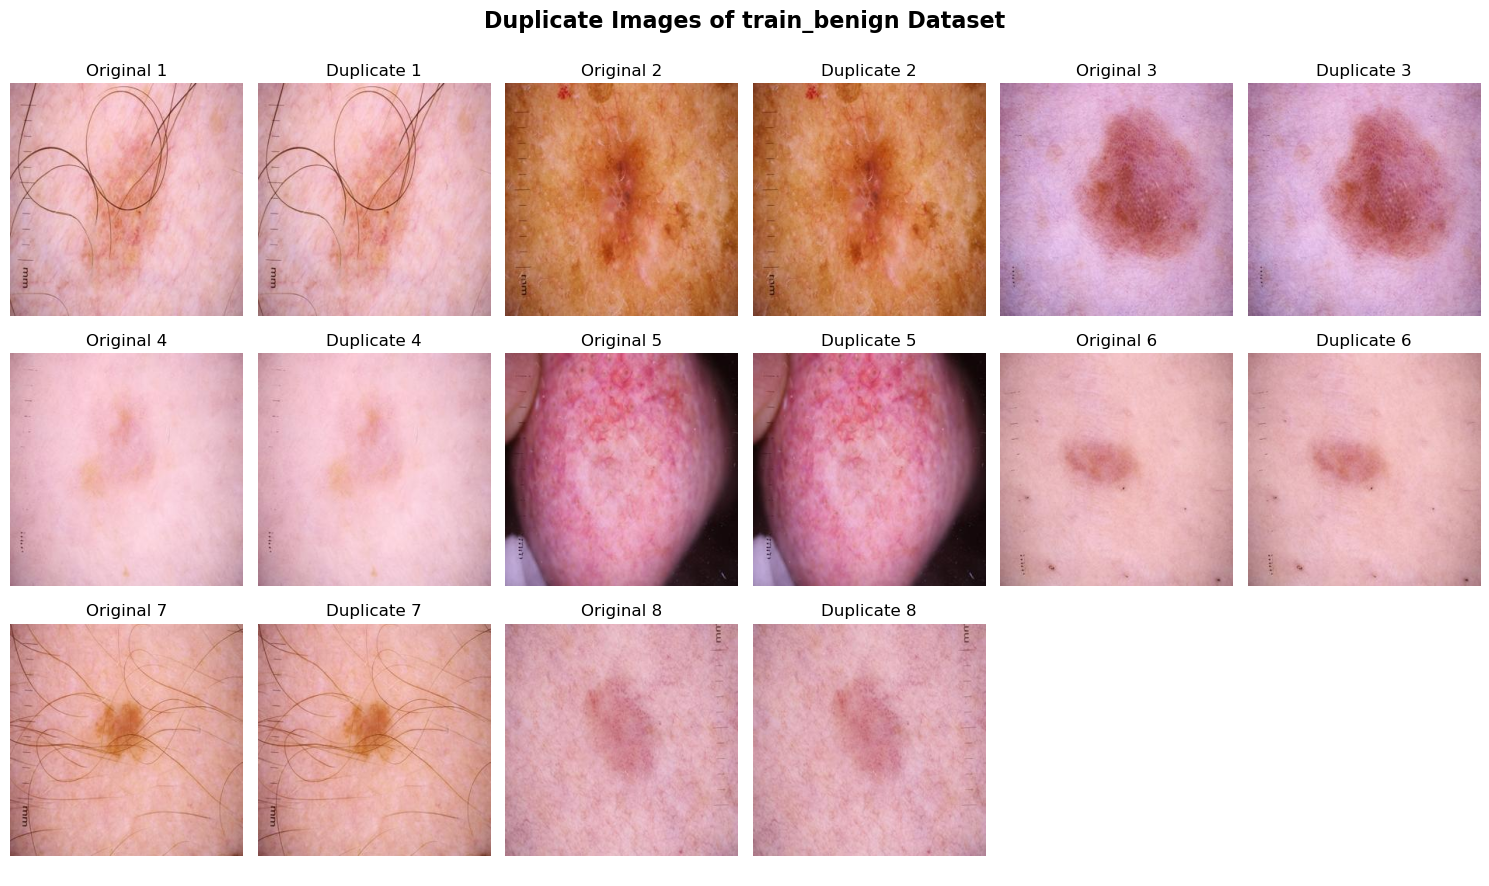

Number of duplicate images in train_malignant: 18


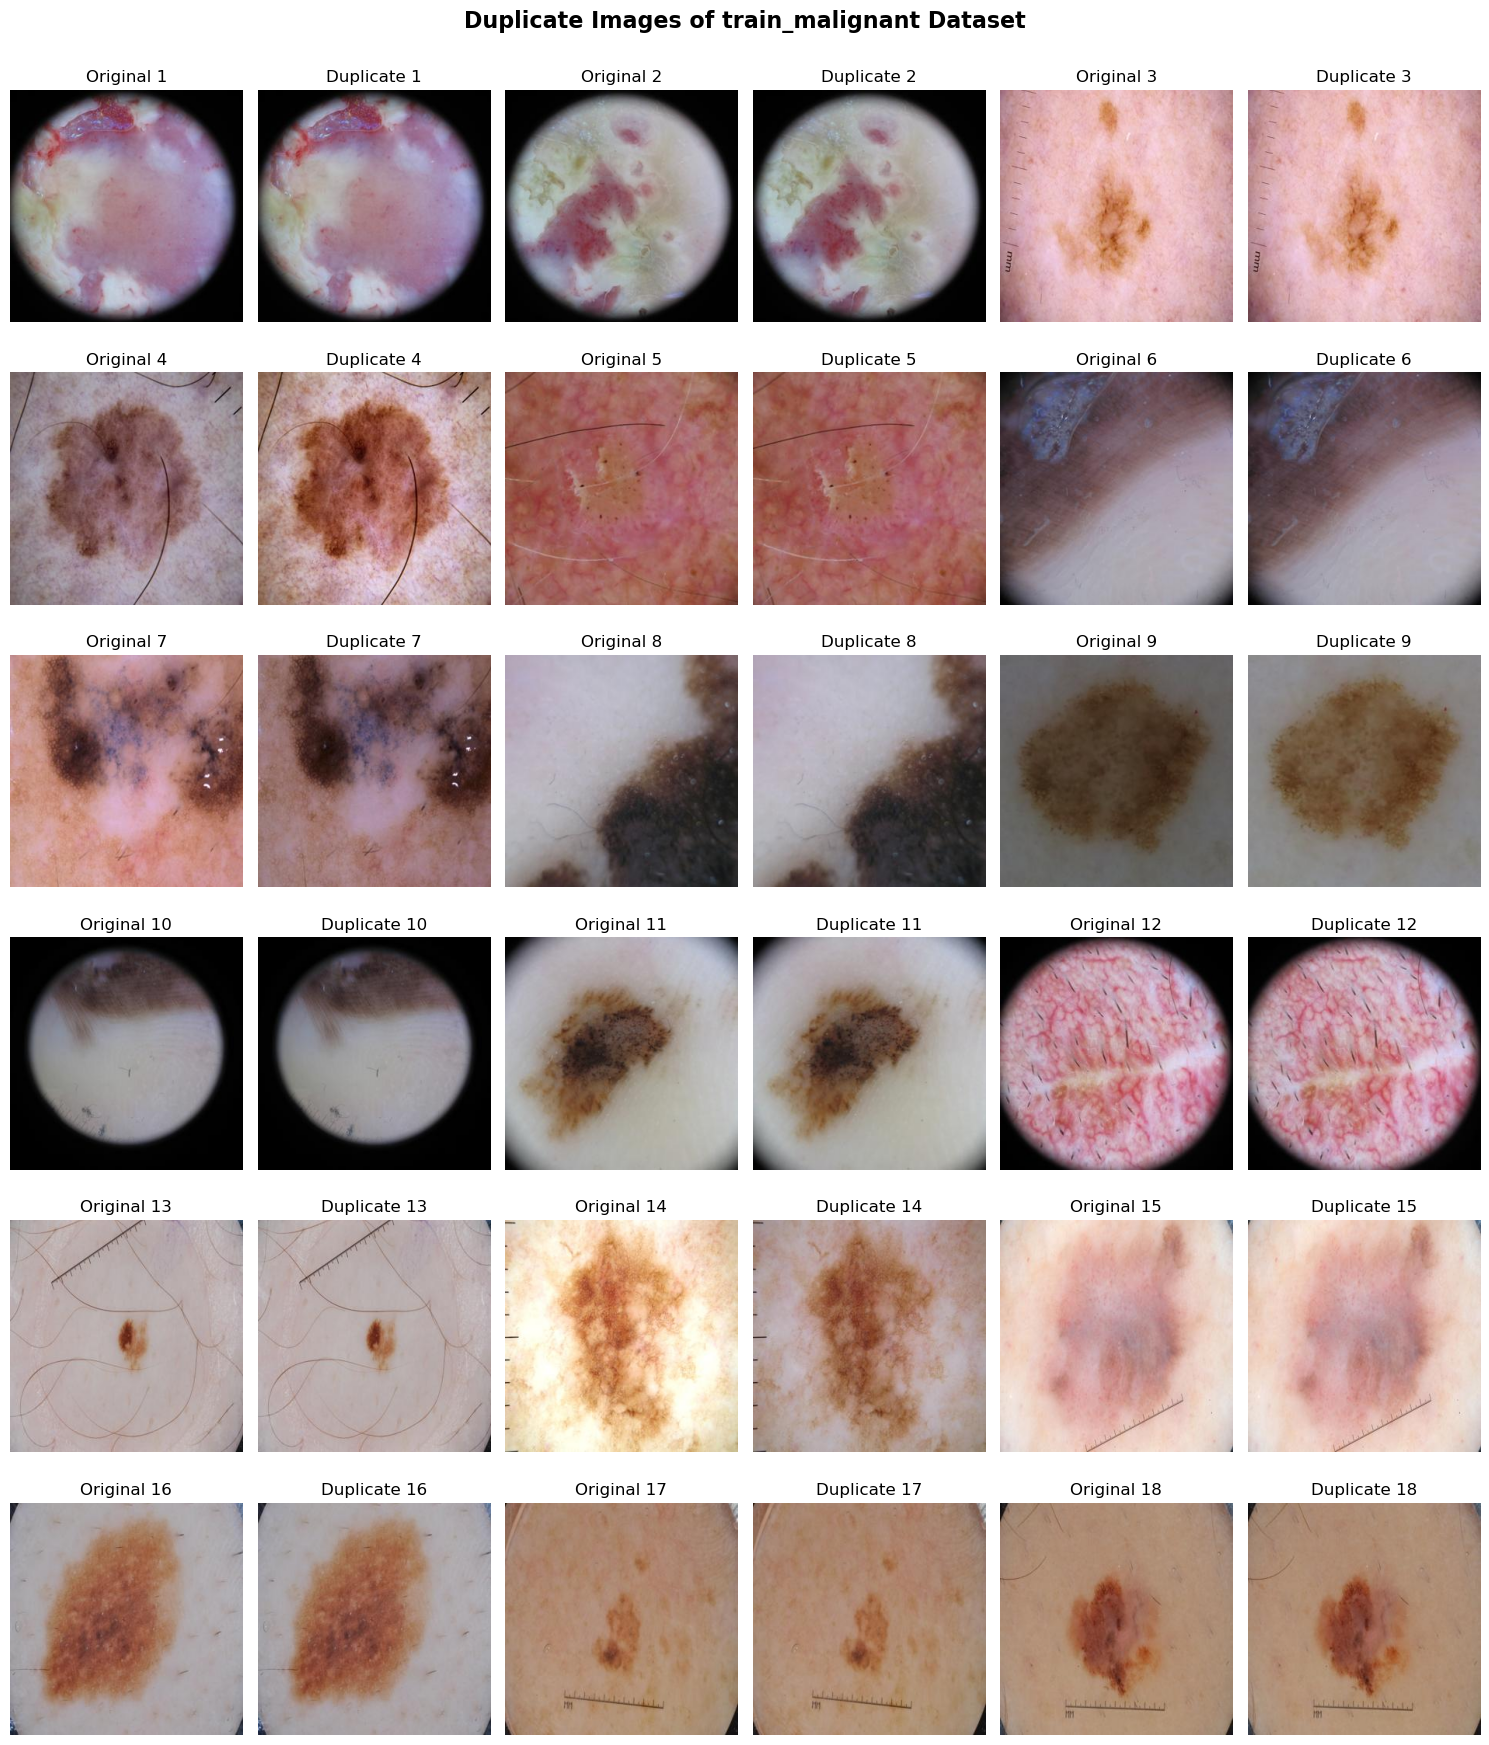

Number of duplicate images in test_benign: 1


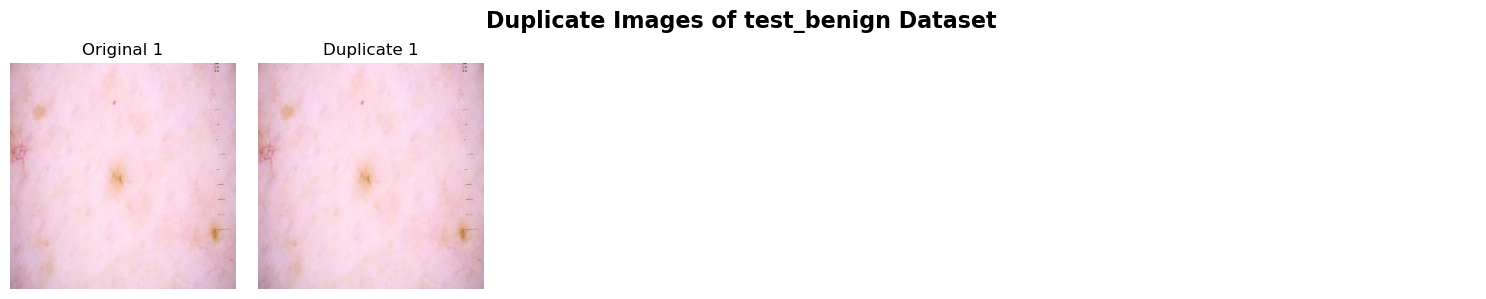

Number of duplicate images in test_malignant: 0
No duplicates found in test_malignant


In [67]:
# Function to display duplicates in 3-pair-per-row format with appropriate headings
def display_duplicates_with_headings(duplicates, dataset_name):
    if not duplicates:
        print(f"No duplicates found in {dataset_name}")
        return
    
    # Calculate the number of rows needed (3 pairs per row)
    num_pairs = len(duplicates)
    rows = (num_pairs + 2) // 3  # 3 pairs per row

    fig, axes = plt.subplots(rows, 6, figsize=(15, rows * 3))
    fig.suptitle(f"Duplicate Images of {dataset_name} Dataset", fontsize=16, fontweight='bold')

    if rows == 1:
        axes = [axes]  

    for idx, (original_path, duplicate_path) in enumerate(duplicates):
        row = idx // 3
        col = (idx % 3) * 2

        # Display original image
        original_image = cv2.imread(original_path)
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
        axes[row][col].imshow(original_image)
        axes[row][col].axis('off')
        axes[row][col].set_title(f"Original {idx+1}")

        # Display duplicate image
        duplicate_image = cv2.imread(duplicate_path)
        duplicate_image = cv2.cvtColor(duplicate_image, cv2.COLOR_BGR2RGB)
        axes[row][col + 1].imshow(duplicate_image)
        axes[row][col + 1].axis('off')
        axes[row][col + 1].set_title(f"Duplicate {idx+1}")

    for extra in range(num_pairs * 2, rows * 6):
        axes[extra // 6][extra % 6].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

# --- Run duplicate detection ---
datasets = [
    (benign_train_dir, "train_benign"),
    (malignant_train_dir, "train_malignant"),
    (benign_test_dir, "test_benign"),
    (malignant_test_dir, "test_malignant")
]

for dataset_path, dataset_name in datasets:
    duplicates = find_duplicates(dataset_path)  # Assuming find_duplicates is already defined
    print(f"Number of duplicate images in {dataset_name}: {len(duplicates)}")

    # Display duplicates in 3-pair-per-row format
    display_duplicates_with_headings(duplicates, dataset_name)

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Deletion of Duplicate Images</h2>

In [72]:
def delete_duplicates(duplicates):
    """
    Deletes duplicate images based on the paths in the duplicates list.
    Assumes duplicates are stored as (original_path, duplicate_path) pairs.
    """
    delete_count = 0
    for original_path, duplicate_path in duplicates:
        try:
            os.remove(duplicate_path)  # Delete the duplicate image
            delete_count += 1
            print(f"Deleted duplicate: {duplicate_path}")
        except FileNotFoundError:
            print(f"File not found (already deleted?): {duplicate_path}")
        except PermissionError:
            print(f"Permission denied: {duplicate_path}")
    return delete_count

# --- Run duplicate detection and deletion without visualization --- 
datasets = [
    (benign_train_dir, "train_benign"),
    (malignant_train_dir, "train_malignant"),
    (benign_test_dir, "test_benign"),
    (malignant_test_dir, "test_malignant")
]

# Iterate over each dataset to find and delete duplicates
for dataset_path, dataset_name in datasets:
    print(f"\nChecking and deleting duplicates in {dataset_name}...")

    # Detect duplicates
    duplicates = find_duplicates(dataset_path)
    print(f"Number of duplicate images detected in {dataset_name}: {len(duplicates)}")

    # Delete duplicates
    deleted_count = delete_duplicates(duplicates)
    
    # Summary
    print(f"{deleted_count} duplicate(s) deleted from {dataset_name}")


Checking and deleting duplicates in train_benign...
Number of duplicate images detected in train_benign: 8
Deleted duplicate: E:\datasets\melanoma_cancer_dataset\train\benign\melanoma_2703.jpg
Deleted duplicate: E:\datasets\melanoma_cancer_dataset\train\benign\melanoma_297.jpg
Deleted duplicate: E:\datasets\melanoma_cancer_dataset\train\benign\melanoma_3040.jpg
Deleted duplicate: E:\datasets\melanoma_cancer_dataset\train\benign\melanoma_3266.jpg
Deleted duplicate: E:\datasets\melanoma_cancer_dataset\train\benign\melanoma_4197.jpg
Deleted duplicate: E:\datasets\melanoma_cancer_dataset\train\benign\melanoma_4542.jpg
Deleted duplicate: E:\datasets\melanoma_cancer_dataset\train\benign\melanoma_4549.jpg
Deleted duplicate: E:\datasets\melanoma_cancer_dataset\train\benign\melanoma_655.jpg
8 duplicate(s) deleted from train_benign

Checking and deleting duplicates in train_malignant...
Number of duplicate images detected in train_malignant: 18
Deleted duplicate: E:\datasets\melanoma_cancer_dat

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Class distribution After Deletion of Duplicate Images</h2>

In [106]:
# Data for the table
data = {
    "Category": ["Benign (Train)", "Malignant (Train)", "Benign (Test)", "Malignant (Test)"],
    "Number of Images": [benign_train, malignant_train, benign_test, malignant_test]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Style the table with thick black borders, bold text, and white background
styled_table = df.style.set_properties(**{
    'border-color': 'black',
    'border-width': '3px',
    'border-style': 'solid',
    'color': 'black',  # Make text black
    'font-weight': 'bold',  # Bold text
    'background-color': 'white'  # White background for entire table
}).set_table_styles([
    {'selector': 'td, th', 'props': [('border-color', 'black'), ('border-width', '3px'), ('border-style', 'solid')]},  # Border styles
])

# Display the styled table without the index column
styled_table.hide(axis="index")  # Hides the index (0, 1, 2, 3)

# Display the table
styled_table

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Visualizing the Class Distribution</h2>

- #### **Verifying the class distribution after Deletion of Duplicate Images in both training and testing datasets.**

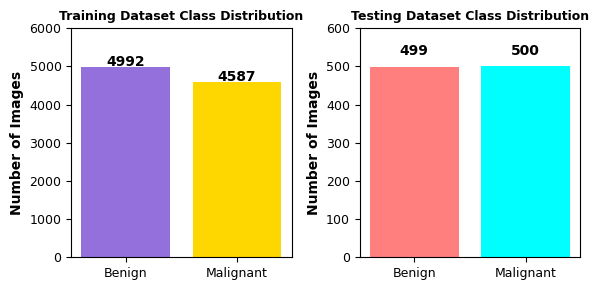

In [111]:
def calculate_class_distribution(benign_dir, malignant_dir):
    """
    Calculates the number of images in each class (Benign and Malignant) for a given dataset.
    """
    benign_count = len(os.listdir(benign_dir))
    malignant_count = len(os.listdir(malignant_dir))
    return benign_count, malignant_count

# Calculate class distribution for training and testing datasets
train_benign, train_malignant = calculate_class_distribution(benign_train_dir, malignant_train_dir)
test_benign, test_malignant = calculate_class_distribution(benign_test_dir, malignant_test_dir)

# Data for training dataset
train_classes = ['Benign', 'Malignant']
train_counts = [train_benign, train_malignant]

# Data for testing dataset
test_classes = ['Benign', 'Malignant']
test_counts = [test_benign, test_malignant]

# Create subplots with a smaller figure size
fig, axs = plt.subplots(1, 2, figsize=(6, 3))  # Smaller size: width=6, height=3

# Plot for training dataset
bars = axs[0].bar(train_classes, train_counts, color=['#9370DB', '#FFD700'])  # Dark Purple and Bright Yellow
axs[0].set_title('Training Dataset Class Distribution', fontsize=9, fontweight='bold')
axs[0].set_ylabel('Number of Images', fontsize=10, fontweight='bold')
axs[0].set_ylim(0, 6000)  # Set y-axis limit for training dataset to 6000
axs[0].tick_params(axis='x', labelsize=9)
axs[0].tick_params(axis='y', labelsize=9)

# Display the values on top of the bars in the training dataset plot
for bar in bars:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval + 30, str(int(yval)), ha='center', fontsize=10, fontweight='bold')

# Plot for testing dataset
bars = axs[1].bar(test_classes, test_counts, color=['#FF7F7F', '#00FFFF'])  # Dark Red and Bright Cyan
axs[1].set_title('Testing Dataset Class Distribution', fontsize=9, fontweight='bold')
axs[1].set_ylabel('Number of Images', fontsize=10, fontweight='bold')
axs[1].set_ylim(0, max(test_counts) + 100)  # Set y-axis limit for testing dataset
axs[1].tick_params(axis='x', labelsize=9)
axs[1].tick_params(axis='y', labelsize=9)

# Display the values on top of the bars in the testing dataset plot
for bar in bars:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, yval + 30, str(int(yval)), ha='center', fontsize=10, fontweight='bold')

# Show plots with tight layout for better presentation
plt.tight_layout()
plt.show()

### **Insights**
- #### **After removing duplicates, the Training set has 4992 benign and 4587 malignant images, indicating a slight difference in the number of training images**
- #### **The testing set includes 499 benign and 500 malignant images, ensuring an equal distribution.**

<h1 style="text-align: center; font-weight: bold; text-decoration: underline; background-color: rgba(255, 255, 255, 0.2);">Exploratory Data Analysis (EDA)</h1>

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Image Dimensions</h2>

- #### **Lists sizes and shapes of the images in the dataset.**

In [117]:
# Function to get image sizes and shapes
def get_image_sizes_and_shapes(directory, num_images=2):
    sizes = []
    shapes = []
    for filename in os.listdir(directory)[:num_images]:
        img_path = os.path.join(directory, filename)
        try:
            with Image.open(img_path) as img:
                size = img.size  # (width, height)
                shape = (img.size[1], img.size[0], 3) if img.mode != 'L' else (img.size[1], img.size[0], 1)
                sizes.append(size)
                shapes.append(shape)
        except Exception as e:
            print(f"Could not open {img_path}: {e}")
    return sizes, shapes
    
# Get image sizes and shapes
benign_train_sizes, benign_train_shapes = get_image_sizes_and_shapes(benign_train_dir)
malignant_train_sizes, malignant_train_shapes = get_image_sizes_and_shapes(malignant_train_dir)
benign_test_sizes, benign_test_shapes = get_image_sizes_and_shapes(benign_test_dir)
malignant_test_sizes, malignant_test_shapes = get_image_sizes_and_shapes(malignant_test_dir)

# Display sizes and shapes in a table-like format
print("Image Sizes (Width, Height) and Shapes (Height, Width, Channels) for Training and Testing Datasets:\n")

# Create header
header = f"{'Dataset':<20} {'Size (W, H)':<20} {'Shape (H, W, C)':<20}"
print(header)
print("-" * len(header))

# Function to print sizes and shapes
def print_sizes_shapes(dataset_name, sizes, shapes):
    for size, shape in zip(sizes, shapes):
        print(f"{dataset_name:<20} {str(size):<20} {str(shape):<20}")

# Display for benign and malignant training datasets
print_sizes_shapes("Benign Train", benign_train_sizes, benign_train_shapes)
print_sizes_shapes("Malignant Train", malignant_train_sizes, malignant_train_shapes)

# Display for benign and malignant testing datasets
print_sizes_shapes("Benign Test", benign_test_sizes, benign_test_shapes)
print_sizes_shapes("Malignant Test", malignant_test_sizes, malignant_test_shapes)

Image Sizes (Width, Height) and Shapes (Height, Width, Channels) for Training and Testing Datasets:

Dataset              Size (W, H)          Shape (H, W, C)     
--------------------------------------------------------------
Benign Train         (300, 300)           (300, 300, 3)       
Benign Train         (300, 300)           (300, 300, 3)       
Malignant Train      (300, 300)           (300, 300, 3)       
Malignant Train      (300, 300)           (300, 300, 3)       
Benign Test          (300, 300)           (300, 300, 3)       
Benign Test          (300, 300)           (300, 300, 3)       
Malignant Test       (300, 300)           (300, 300, 3)       
Malignant Test       (300, 300)           (300, 300, 3)       


<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Visualizing Image Dimensions</h2>

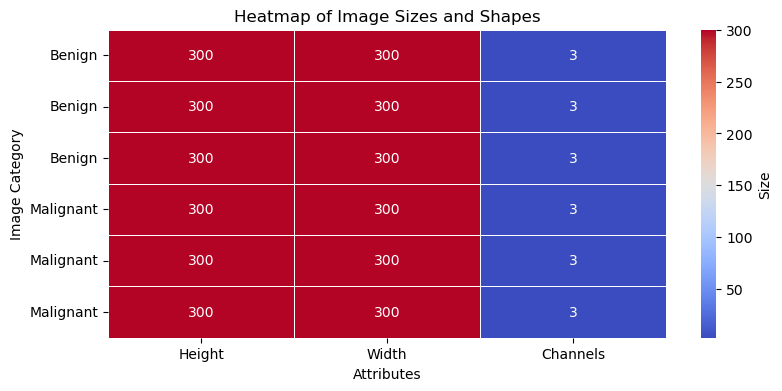

In [120]:
# Function to get shapes of the first 10 images in a directory
def get_image_shapes(directory, limit=3):
    shapes = []
    count = 0
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            img_path = os.path.join(directory, filename)
            with Image.open(img_path) as img:
                img_array = np.array(img)  # Convert to NumPy array
                shapes.append(img_array.shape)  # Get shape of the image array
                count += 1
                if count >= limit:
                    break
    return shapes

# Get shapes for the first 10 benign and malignant training images
benign_shapes = get_image_shapes(benign_train_dir)
malignant_shapes = get_image_shapes(malignant_train_dir)

# Prepare data for heatmap
benign_heights, benign_widths, benign_channels = zip(*benign_shapes)
malignant_heights, malignant_widths, malignant_channels = zip(*malignant_shapes)

# Combine data into a single array for heatmap
data = np.array([
    benign_heights + malignant_heights,
    benign_widths + malignant_widths,
    benign_channels + malignant_channels
]).T

# Create labels for heatmap
labels = ['Height', 'Width', 'Channels']
categories = ['Benign'] * len(benign_heights) + ['Malignant'] * len(malignant_heights)

# Create a DataFrame for better heatmap visualization
import pandas as pd

df = pd.DataFrame(data, columns=labels, index=categories)

# Plot heatmap
plt.figure(figsize=(9, 4))
sns.heatmap(df, annot=True, cmap='coolwarm', fmt='g', linewidths=.5, cbar_kws={'label': 'Size'})
plt.title('Heatmap of Image Sizes and Shapes')
plt.xlabel('Attributes')
plt.ylabel('Image Category')
plt.show()

### - **Insights**
- #### **All images in both the training and testing sets have consistent dimensions of 300x300 pixels.**
- #### **Each image includes three color channels (Red, Green, Blue), which will support color-based analysis.**

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Image Aspect Ratio Distribution</h2>

- #### **This section analyzes the shape of images to ensure uniformity for model training.**

In [128]:
# Get the list of image paths
benign_train_paths = [os.path.join(benign_train_dir, f) for f in os.listdir(benign_train_dir) if f.endswith('.jpg')]
malignant_train_paths = [os.path.join(malignant_train_dir, f) for f in os.listdir(malignant_train_dir) if f.endswith('.jpg')]
benign_test_paths = [os.path.join(benign_test_dir, f) for f in os.listdir(benign_test_dir) if f.endswith('.jpg')]
malignant_test_paths = [os.path.join(malignant_test_dir, f) for f in os.listdir(malignant_test_dir) if f.endswith('.jpg')]

# Aspect Ratio Calculation Without Visualization
benign_train_ratios = []
malignant_train_ratios = []
benign_test_ratios = []
malignant_test_ratios = []

# Calculate aspect ratios for training dataset (first 100 images)
for img_path in benign_train_paths[:100]:
    image = Image.open(img_path)
    benign_train_ratios.append(image.width / image.height)

for img_path in malignant_train_paths[:100]:
    image = Image.open(img_path)
    malignant_train_ratios.append(image.width / image.height)

# Calculate aspect ratios for testing dataset (first 100 images)
for img_path in benign_test_paths[:100]:
    image = Image.open(img_path)
    benign_test_ratios.append(image.width / image.height)

for img_path in malignant_test_paths[:100]:
    image = Image.open(img_path)
    malignant_test_ratios.append(image.width / image.height)

# Output results
print("Train Benign Aspect Ratios:", benign_train_ratios[:10])  # Display first 10 as a sample
print("Train Malignant Aspect Ratios:", malignant_train_ratios[:10])
print("Test Benign Aspect Ratios:", benign_test_ratios[:10])
print("Test Malignant Aspect Ratios:", malignant_test_ratios[:10])

# Checking the number of images in each category
benign_train_count = len(os.listdir(benign_train_dir))
malignant_train_count = len(os.listdir(malignant_train_dir))
benign_test_count = len(os.listdir(benign_test_dir))
malignant_test_count = len(os.listdir(malignant_test_dir))

Train Benign Aspect Ratios: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Train Malignant Aspect Ratios: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Test Benign Aspect Ratios: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Test Malignant Aspect Ratios: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


### **Insights:**
- #### **All Aspect ratios are approximately 1.0, indicating square shaped images.**
- #### **No resizing or cropping is needed because it is suggesting well structured dataset.**

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Visualization of Aspect Ratio Distribution</h2>

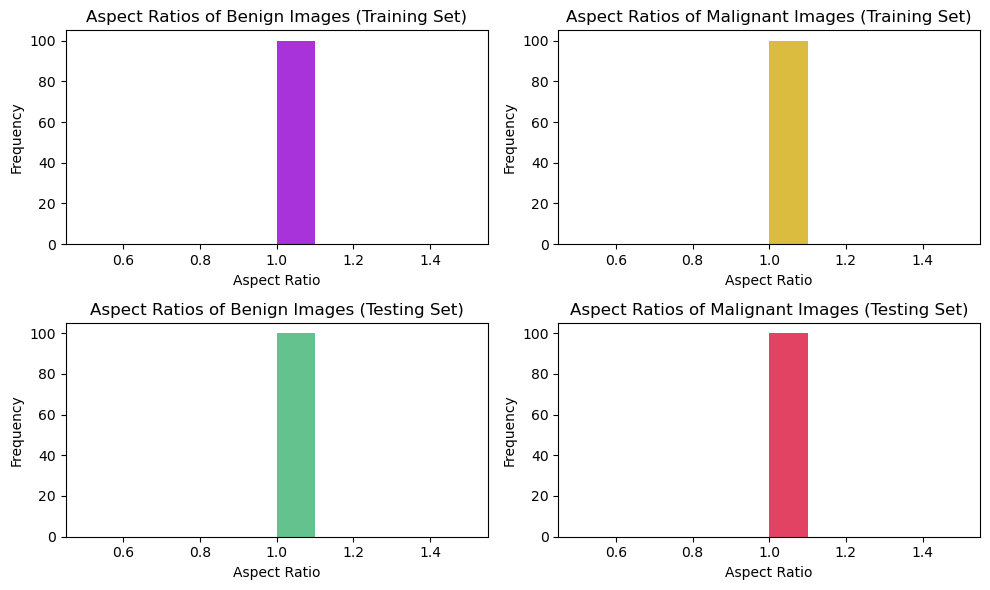

In [132]:
# Visualization of Aspect Ratios with Histograms
plt.figure(figsize=(10, 6))

# Training dataset histograms
plt.subplot(2, 2, 1)
plt.hist(benign_train_ratios, bins=10, color='darkviolet', alpha=0.8)
plt.title("Aspect Ratios of Benign Images (Training Set)")
plt.xlabel("Aspect Ratio")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
plt.hist(malignant_train_ratios, bins=10, color='#D4AC0D', alpha=0.8) 
plt.title("Aspect Ratios of Malignant Images (Training Set)")
plt.xlabel("Aspect Ratio")
plt.ylabel("Frequency")

# Testing dataset histograms
plt.subplot(2, 2, 3)
plt.hist(benign_test_ratios, bins=10, color='mediumseagreen', alpha=0.8)
plt.title("Aspect Ratios of Benign Images (Testing Set)")
plt.xlabel("Aspect Ratio")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.hist(malignant_test_ratios, bins=10, color='crimson', alpha=0.8)
plt.title("Aspect Ratios of Malignant Images (Testing Set)")
plt.xlabel("Aspect Ratio")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### **Histogram Insights:**
- #### **The histograms display a uniform distribution around **1.0** for both datasets.**  
- #### **This confirms that the images are square.**

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Color Channel Intensity Analysis</h2>

- #### **This step highlights the dominant color channels in the images.**
- #### **Calculates average RGB values for benign and malignant images for both train and test datasets.**

In [137]:
# Function to calculate color channel distributions for the first 'n' images in a directory
def calculate_color_channel_distribution(directory, num_images=15):
    red_channel = []
    green_channel = []
    blue_channel = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            img_path = os.path.join(directory, filename)
            image = Image.open(img_path).convert("RGB")
            red_channel.append(np.array(image)[:, :, 0].mean())  # Average Red channel
            green_channel.append(np.array(image)[:, :, 1].mean())  # Average Green channel
            blue_channel.append(np.array(image)[:, :, 2].mean())  # Average Blue channel
            if len(red_channel) >= num_images:  # Stop after collecting specified number of images
                break
    return np.mean(red_channel), np.mean(green_channel), np.mean(blue_channel)

# Calculate color channel distributions for training and testing datasets
train_benign_distribution = calculate_color_channel_distribution(benign_train_dir)
train_malignant_distribution = calculate_color_channel_distribution(malignant_train_dir)
test_benign_distribution = calculate_color_channel_distribution(benign_test_dir)
test_malignant_distribution = calculate_color_channel_distribution(malignant_test_dir)

# Display color channel distributions for training dataset
print("Average Color Channel Distributions for Benign Training Images:", train_benign_distribution)
print("Average Color Channel Distributions for Malignant Training Images:", train_malignant_distribution)

# Display color channel distributions for testing dataset
print("Average Color Channel Distributions for Benign Testing Images:", test_benign_distribution)
print("Average Color Channel Distributions for Malignant Testing Images:", test_malignant_distribution)

Average Color Channel Distributions for Benign Training Images: (218.24404, 169.75890222222225, 167.49020148148148)
Average Color Channel Distributions for Malignant Training Images: (162.60763037037037, 129.74478296296297, 129.33389555555559)
Average Color Channel Distributions for Benign Testing Images: (190.03309111111108, 148.4286340740741, 143.26716444444446)
Average Color Channel Distributions for Malignant Testing Images: (175.50189481481485, 144.06392518518518, 136.95800074074074)


<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Visualization of Average RGB Color Channel Intensities</h2>

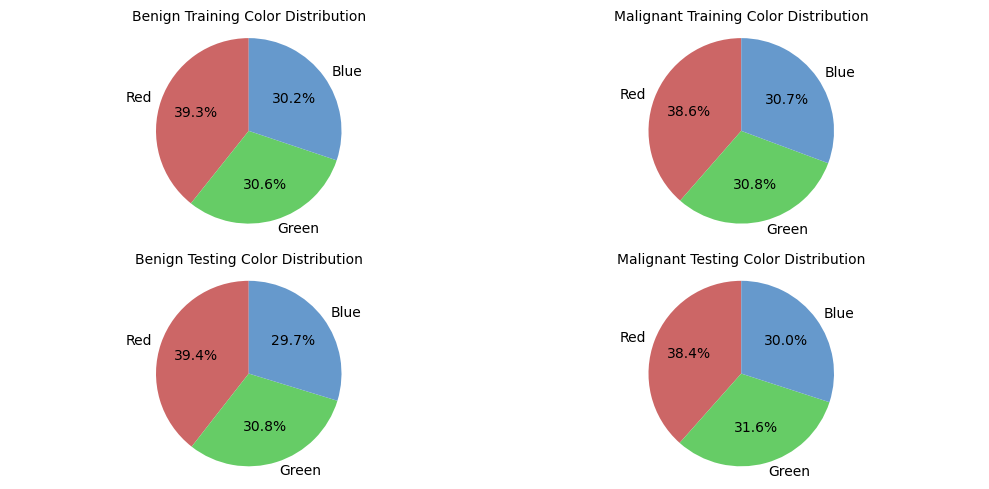

In [143]:
# Function to plot color distribution as pie charts
def plot_color_distribution_pie_charts():
    # Data for pie charts
    train_data = [train_benign_distribution, train_malignant_distribution]
    test_data = [test_benign_distribution, test_malignant_distribution]

    # Titles for the pie charts
    titles = [
        'Benign Training Color Distribution',
        'Malignant Training Color Distribution',
        'Benign Testing Color Distribution',
        'Malignant Testing Color Distribution'
    ]
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 5))  # Create a 2x2 grid for pie charts

    # Updated darker colors for RGB channels
    darker_colors = ['#CC6666', '#66CC66', '#6699CC']  # Darker shades for Red, Green, Blue

    # Plot each pie chart
    for ax, data, title in zip(axes.flatten(), train_data + test_data, titles):
        ax.pie(data, labels=['Red', 'Green', 'Blue'], autopct='%1.1f%%', startangle=90, colors=darker_colors)
        ax.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
        ax.set_title(title, fontsize=10)

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Call the function to plot pie charts
plot_color_distribution_pie_charts()

### **Insights**
- #### **The Red channel has much higher intensity values than Green and Blue channels in both the training and testing datasets.**
- #### **This suggests a strong presence of red hues in the images across all categories.**

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">HSV Color Distribution</h2>

- #### **Hue (H): The color type, representing the shade of the color.**
- #### **Saturation (S): The intensity or vividness of the color.**
- #### **Value (V): The brightness or lightness of the color.**

In [147]:
# Function to calculate average HSV for the first 'n' images in a directory
def calculate_hsv_average(directory, num_images=5):
    h_channel = []
    s_channel = []
    v_channel = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            img_path = os.path.join(directory, filename)
            image = cv2.imread(img_path)
            hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Convert to HSV
            h_channel.append(np.mean(hsv_image[:, :, 0]))  # Average Hue
            s_channel.append(np.mean(hsv_image[:, :, 1]))  # Average Saturation
            v_channel.append(np.mean(hsv_image[:, :, 2]))  # Average Value
            if len(h_channel) >= num_images:  # Stop after collecting specified number of images
                break
    return np.mean(h_channel), np.mean(s_channel), np.mean(v_channel)

# Calculate HSV averages for training and testing datasets
train_benign_hsv = calculate_hsv_average(benign_train_dir)
train_malignant_hsv = calculate_hsv_average(malignant_train_dir)
test_benign_hsv = calculate_hsv_average(benign_test_dir)
test_malignant_hsv = calculate_hsv_average(malignant_test_dir)

# Display average HSV values for training dataset
print("Average HSV Values for Benign Training Images:", train_benign_hsv)
print("Average HSV Values for Malignant Training Images:", train_malignant_hsv)

# Display average HSV values for testing dataset
print("Average HSV Values for Benign Testing Images:", test_benign_hsv)
print("Average HSV Values for Malignant Testing Images:", test_malignant_hsv)

Average HSV Values for Benign Training Images: (66.56483333333333, 57.51688, 223.51130444444442)
Average HSV Values for Malignant Training Images: (69.27341333333332, 59.55464222222222, 156.08914)
Average HSV Values for Benign Testing Images: (85.28265777777777, 74.65728888888889, 201.43585333333334)
Average HSV Values for Malignant Testing Images: (38.311091111111104, 66.12951333333334, 197.17668444444445)


<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Visualizing HSV Color Distribution</h2>

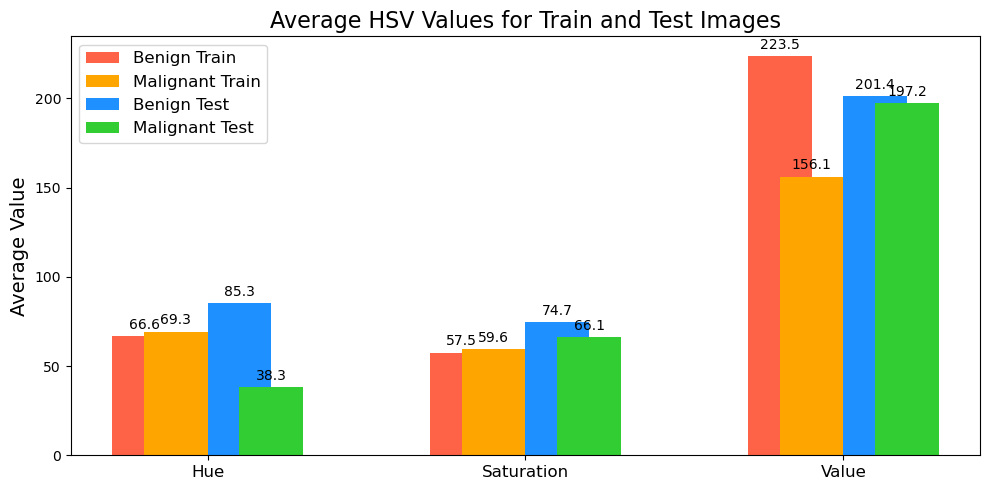

In [150]:
# Prepare data for HSV visualization
def prepare_hsv_data(benign_hsv, malignant_hsv):
    return np.array(benign_hsv), np.array(malignant_hsv)

# Prepare HSV averages for training and testing datasets
train_benign_hsv_means = prepare_hsv_data(train_benign_hsv, train_malignant_hsv)
test_benign_hsv_means = prepare_hsv_data(test_benign_hsv, test_malignant_hsv)

# Labels and positions for plotting
labels = ['Hue', 'Saturation', 'Value']
x = np.arange(len(labels))  # label locations
width = 0.2  # width of the bars

fig, ax = plt.subplots(figsize=(10, 5))  # Set figure size

# Create bars for training data with unique colors
bars1 = ax.bar(x - width, train_benign_hsv_means[0], width, label='Benign Train', color='#FF6347')  # Tomato
bars2 = ax.bar(x - width/2, train_benign_hsv_means[1], width, label='Malignant Train', color='#FFA500')  # Orange

# Create bars for testing data with unique colors
bars3 = ax.bar(x + width/2, test_benign_hsv_means[0], width, label='Benign Test', color='#1E90FF')  # Dodger Blue
bars4 = ax.bar(x + width, test_benign_hsv_means[1], width, label='Malignant Test', color='#32CD32')  # Lime Green

# Add labels and title
ax.set_ylabel('Average Value', fontsize=14)
ax.set_title('Average HSV Values for Train and Test Images', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(fontsize=12)

# Annotate bars with their heights, formatted to one decimal place
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',  # Format to one decimal place
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Annotate each set of bars
autolabel(bars1)
autolabel(bars2)
autolabel(bars3)
autolabel(bars4)

plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.show()

###  **Insights**
- #### **The value bars are higher than the hue and saturation bars, indicating that the images are much brighter overall.**
- #### **The saturation levels of both benign and malignant images are relatively similar, indicating that both classes have a comparable intensity of colors.**
- #### **The hue values for malignant images are a bit higher than for benign images, indicating they may have a different color tone.**

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Texture Analysis</h2>

- #### **Texture analysis with Local Binary Patterns (LBP) describes surface patterns to differentiate between benign and malignant images.**

In [155]:
from skimage import feature
from skimage import io
# Function to calculate LBP for the first 'n' images in a directory
def calculate_lbp(directory, num_images=5):
    lbp_values = []
    
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            img_path = os.path.join(directory, filename)
            image = io.imread(img_path, as_gray=True)  # Read image as grayscale
            
            # Convert to uint8 to avoid warnings
            image = (image * 255).astype(np.uint8)  # Scale to [0, 255] range
            
            # Calculate LBP
            lbp = feature.local_binary_pattern(image, P=8, R=1, method='uniform')
            # Calculate the histogram of LBP
            lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), density=True)  # 10 bins for uniform LBP
            
            lbp_values.append(lbp_hist)
            if len(lbp_values) >= num_images:
                break

    # Return the average LBP histogram across the images
    return np.mean(lbp_values, axis=0)

# Calculate LBP values for training and testing datasets
train_benign_lbp = calculate_lbp(benign_train_dir)
train_malignant_lbp = calculate_lbp(malignant_train_dir)
test_benign_lbp = calculate_lbp(benign_test_dir)
test_malignant_lbp = calculate_lbp(malignant_test_dir)

# Display average LBP values
print("Average LBP Values for Benign Training Images:", train_benign_lbp)
print("Average LBP Values for Malignant Training Images:", train_malignant_lbp)
print("Average LBP Values for Benign Testing Images:", test_benign_lbp)
print("Average LBP Values for Malignant Testing Images:", test_malignant_lbp)

Average LBP Values for Benign Training Images: [0.01683333 0.04582889 0.02040444 0.11617556 0.13957111 0.24029333
 0.09410444 0.08789111 0.16829556 0.07060222]
Average LBP Values for Malignant Training Images: [0.01293778 0.03678889 0.02659778 0.11817556 0.20046667 0.22136667
 0.08417556 0.06024667 0.18186444 0.05738   ]
Average LBP Values for Benign Testing Images: [0.02714667 0.0691     0.03421778 0.11562    0.19203556 0.19465778
 0.09498444 0.08625111 0.09143333 0.09455333]
Average LBP Values for Malignant Testing Images: [0.02248444 0.05484    0.04298667 0.12915333 0.19218    0.20159333
 0.09987111 0.06672    0.10616889 0.08400222]


<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Visual Representation of Texture Analysis</h2>

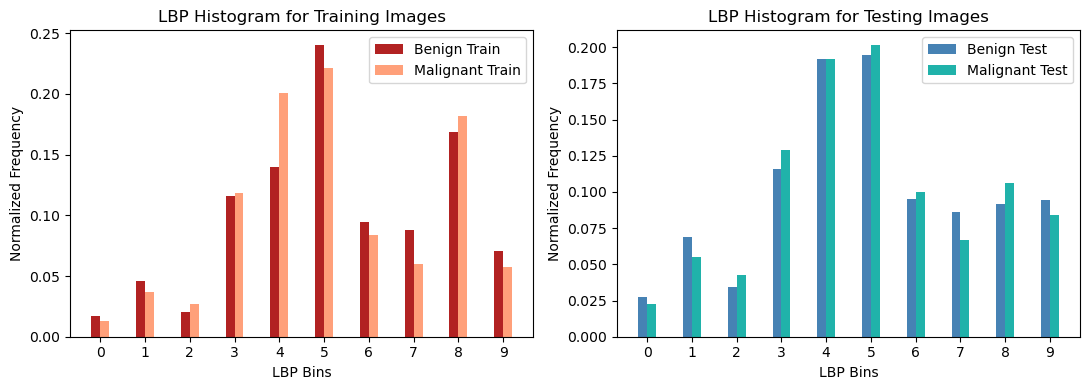

In [158]:
# Function to plot LBP histograms
def plot_lbp_histogram(train_benign_lbp, train_malignant_lbp, test_benign_lbp, test_malignant_lbp):
    plt.figure(figsize=(11, 4))

    # Define x-axis labels for LBP bins
    labels = np.arange(0, 10)  

    # Plot training data
    plt.subplot(1, 2, 1)
    plt.bar(labels - 0.1, train_benign_lbp, width=0.2, label='Benign Train', color='#B22222') 
    plt.bar(labels + 0.1, train_malignant_lbp, width=0.2, label='Malignant Train', color='#FFA07A') 
    plt.title('LBP Histogram for Training Images')
    plt.xlabel('LBP Bins')
    plt.ylabel('Normalized Frequency')
    plt.xticks(labels)
    plt.legend()

    # Plot testing data
    plt.subplot(1, 2, 2)
    plt.bar(labels - 0.1, test_benign_lbp, width=0.2, label='Benign Test', color='#4682B4')  
    plt.bar(labels + 0.1, test_malignant_lbp, width=0.2, label='Malignant Test', color='#20B2AA') 
    plt.title('LBP Histogram for Testing Images')
    plt.xlabel('LBP Bins')
    plt.ylabel('Normalized Frequency')
    plt.xticks(labels)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Visualize the LBP histograms
plot_lbp_histogram(train_benign_lbp, train_malignant_lbp, test_benign_lbp, test_malignant_lbp)

###  **Insights**
- #### **The training histogram shows that benign and malignant images are mostly similar in texture, with only small differences**
- #### **The testing histogram has small differences, but benign and malignant images still look very similar, making it hard to see the difference.**

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Average Pixel Intensity Analysis</h2>

- #### **Average pixel intensity analysis assesses image quality by calculating the mean, standard deviation, min, and max pixel intensities.**

In [164]:
import random
def calculate_average_pixel_intensity(directory, sample_size=20):
    intensities = []
    # Get only image files
    image_files = [f for f in os.listdir(directory) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    # Sample a smaller subset if there are more files than the sample size
    sample_images = random.sample(image_files, min(sample_size, len(image_files)))

    for filename in sample_images:
        img_path = os.path.join(directory, filename)
        try:
            with Image.open(img_path) as img:
                img_array = np.array(img) / 255.0  # Normalize to range [0, 1]
                intensities.extend(img_array.flatten())
        except Exception as e:
            print(f"Could not open {img_path}: {e}")
    
    if not intensities:
        return 0, 0, 0, 0  # Avoid errors if no intensities were collected
    
    mean_intensity = np.mean(intensities)
    std_intensity = np.std(intensities)
    min_intensity = np.min(intensities)
    max_intensity = np.max(intensities)
    
    return mean_intensity, std_intensity, min_intensity, max_intensity

# Store results
results = []

# Calculate intensities for each dataset
datasets = {
    "Benign Train": benign_train_dir,
    "Malignant Train": malignant_train_dir,
    "Benign Test": benign_test_dir,
    "Malignant Test": malignant_test_dir,
}

for name, directory in datasets.items():
    mean, std, min_val, max_val = calculate_average_pixel_intensity(directory, sample_size=20)
    results.append([name, mean, std, min_val, max_val])

# Create a DataFrame for better visualization
results_df = pd.DataFrame(results, columns=["Dataset", "MeanIntensity", "Standard Dev", "Min Intensity", "Max Intensity"])

# Display the results
print(results_df)

           Dataset  MeanIntensity  Standard Dev  Min Intensity  Max Intensity
0     Benign Train       0.657992      0.191928            0.0            1.0
1  Malignant Train       0.526831      0.232479            0.0            1.0
2      Benign Test       0.679477      0.198586            0.0            1.0
3   Malignant Test       0.442712      0.276258            0.0            1.0


 ### **Insights**
- #### **Benign images show higher mean intensities than malignant ones.**
- #### **Malignant images have greater pixel intensity variability.**

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Visualizing Average Pixel Intensities</h2>

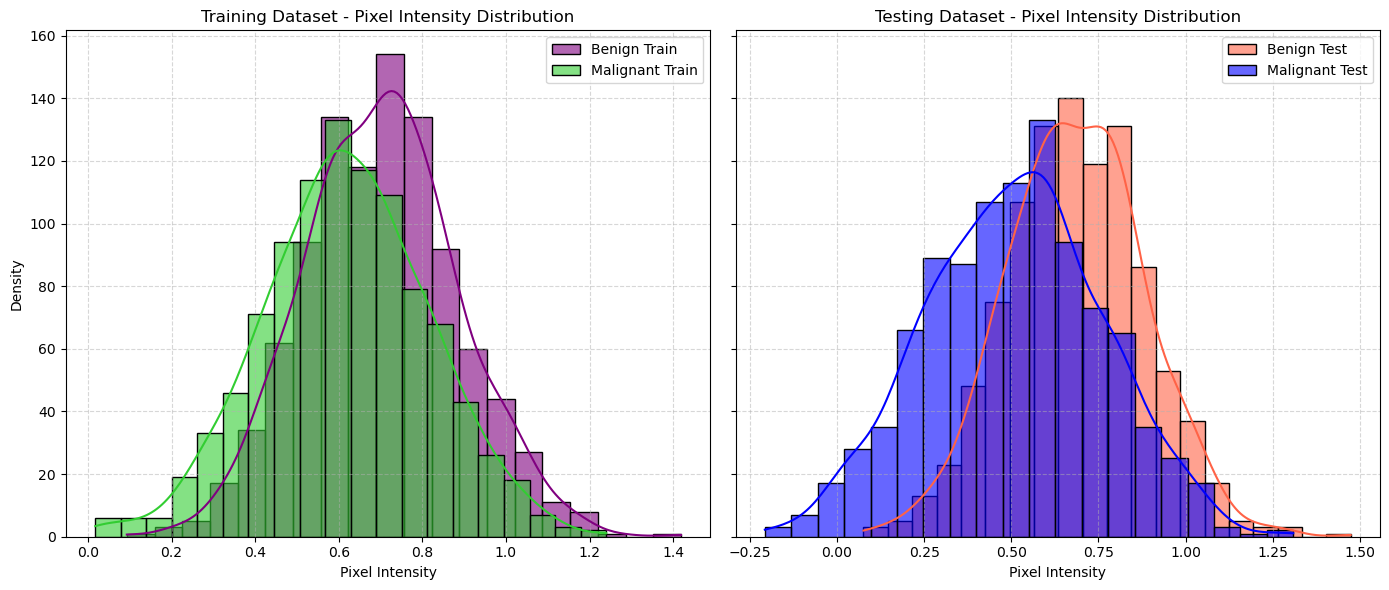

In [168]:
# Sample data for demonstration, based on your provided summary stats
np.random.seed(42)
benign_train_intensity = np.random.normal(0.6988, 0.1869, 1000)
malignant_train_intensity = np.random.normal(0.6034, 0.1993, 1000)
benign_test_intensity = np.random.normal(0.6835, 0.2013, 1000)
malignant_test_intensity = np.random.normal(0.5123, 0.2457, 1000)

# Set up the figure and subplots for training and testing datasets
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Training Dataset Plots
sns.histplot(benign_train_intensity, bins=20, kde=True, color='purple', label='Benign Train', ax=axs[0], alpha=0.6)
sns.histplot(malignant_train_intensity, bins=20, kde=True, color='limegreen', label='Malignant Train', ax=axs[0], alpha=0.6)
axs[0].set_title("Training Dataset - Pixel Intensity Distribution")
axs[0].set_xlabel("Pixel Intensity")
axs[0].set_ylabel("Density")
axs[0].legend(loc="upper right")
axs[0].grid(True, linestyle='--', alpha=0.5)

# Testing Dataset Plots
sns.histplot(benign_test_intensity, bins=20, kde=True, color='tomato', label='Benign Test', ax=axs[1], alpha=0.6)
sns.histplot(malignant_test_intensity, bins=20, kde=True, color='blue', label='Malignant Test', ax=axs[1], alpha=0.6)
axs[1].set_title("Testing Dataset - Pixel Intensity Distribution")
axs[1].set_xlabel("Pixel Intensity")
axs[1].legend(loc="upper right")
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### **Insights**
- #### **Visuals clearly show the intensity differences between benign and malignant images.**
- #### **Histograms highlight significant variations in pixel intensity distributions.**

<h1 style="text-align: center; font-weight: bold; text-decoration: underline; background-color: rgba(255, 255, 255, 0.2);">Data Processing</h1>

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">RGB to Grayscale</h2>

- #### **Grayscaling changes a colored image to shades of gray, keeping only brightness.**

In [178]:
# Function to convert RGB images to grayscale and save them
def convert_to_grayscale(input_dir, output_dir):
    # Make sure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Process each image in the input directory
    for filename in os.listdir(input_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust based on your file type
            img_path = os.path.join(input_dir, filename)
            img = Image.open(img_path).convert('L')  # Convert to grayscale (L mode)
            
            # Save grayscale image in the output directory
            output_path = os.path.join(output_dir, filename)
            img.save(output_path)
    
    print(f"Grayscale conversion completed for {input_dir}.")

# Convert and save images for each dataset category with simplified output
convert_to_grayscale(benign_train_dir, grayscale_benign_train_dir)
convert_to_grayscale(malignant_train_dir, grayscale_malignant_train_dir)
convert_to_grayscale(benign_test_dir, grayscale_benign_test_dir)
convert_to_grayscale(malignant_test_dir, grayscale_malignant_test_dir)

print("Grayscale conversion completed for all images.")

Grayscale conversion completed for E:\datasets\melanoma_cancer_dataset\train\benign.
Grayscale conversion completed for E:\datasets\melanoma_cancer_dataset\train\malignant.
Grayscale conversion completed for E:\datasets\melanoma_cancer_dataset\test\benign.
Grayscale conversion completed for E:\datasets\melanoma_cancer_dataset\test\malignant.
Grayscale conversion completed for all images.


<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Original vs Grayscaled Images</h2>

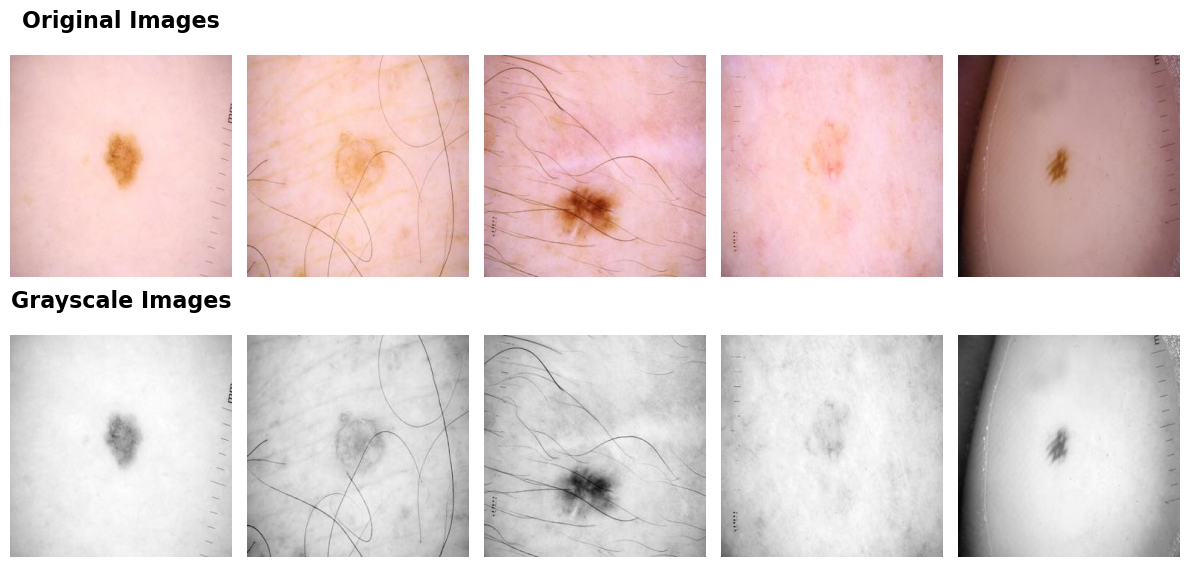

In [194]:
# Function to display the original RGB and grayscale images in a row
def display_images(original_images_dir, grayscale_images_dir, num_images=5):
    # Get filenames for the original and grayscale images
    original_images = os.listdir(original_images_dir)[:num_images]
    grayscale_images = os.listdir(grayscale_images_dir)[:num_images]
    
    # Create a 2-row plot
    fig, axes = plt.subplots(2, num_images, figsize=(12, 6))
    
    # Set the titles for the rows
    axes[0, 0].set_title('Original Images', fontsize=16, fontweight='bold', pad=20)
    axes[1, 0].set_title('Grayscale Images', fontsize=16, fontweight='bold', pad=20)
    
    for i in range(num_images):
        # Display original images
        img_path = os.path.join(original_images_dir, original_images[i])
        img = Image.open(img_path)
        axes[0, i].imshow(img)
        axes[0, i].axis('off')  # Turn off axis
        
        # Display grayscale images
        gray_img_path = os.path.join(grayscale_images_dir, grayscale_images[i])
        gray_img = Image.open(gray_img_path)
        axes[1, i].imshow(gray_img, cmap='gray')
        axes[1, i].axis('off')  # Turn off axis
    
    plt.tight_layout()
    plt.show()

# Directories for original and grayscaled images
original_benign_train_dir = r'E:\datasets\melanoma_cancer_dataset\train\benign'
grayscale_benign_train_dir = r'E:\Grayscale_images\Grayscale_Training\benign_train'

# Display the images
display_images(original_benign_train_dir, grayscale_benign_train_dir)

- ### **Insights**
- #### **From the above images we can understand that the grayscaled images offer a simpler view, making it easier to analyze and compare.**

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Normalization of Grayscale Images</h2>

- #### **Normalization scales image pixel values to a standard range of 0 to 1, improving model accuracy and training stability.**

In [209]:
# Function to normalize grayscale images and save them
def normalize_grayscale_images(input_dir, output_dir):
    
    os.makedirs(output_dir, exist_ok=True)
    
    # Process each image in the input directory
    for filename in os.listdir(input_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):  
            img_path = os.path.join(input_dir, filename)
            img = Image.open(img_path).convert('L')  
            
            # Normalize the image by dividing by 255 to scale pixel values to [0, 1]
            img_array = np.array(img) / 255.0
            normalized_img = Image.fromarray((img_array * 255).astype(np.uint8))  
            
            # Save the normalized image in the output directory
            output_path = os.path.join(output_dir, filename)
            normalized_img.save(output_path)
    
    print(f"Normalization completed for images in {input_dir}.")

# Normalize images for each category

# Training set
normalize_grayscale_images(r'E:\Grayscale_images\Grayscale_Training\benign_train', 
                           r'E:\Grayscale_Normalized_images\Grayscaled_Normalized_Training\benign_train')
normalize_grayscale_images(r'E:\Grayscale_images\Grayscale_Training\malignant_train', 
                           r'E:\Grayscale_Normalized_images\Grayscaled_Normalized_Training\malignant_train')

# Testing set
normalize_grayscale_images(r'E:\Grayscale_images\Grayscale_Testing\benign_test', 
                           r'E:\Grayscale_Normalized_images\Grayscaled_Normalized_Testing\benign_test')
normalize_grayscale_images(r'E:\Grayscale_images\Grayscale_Testing\malignant_test', 
                           r'E:\Grayscale_Normalized_images\Grayscaled_Normalized_Testing\malignant_test')

print("Normalization completed for all grayscale images.")

Normalization completed for images in E:\Grayscale_images\Grayscale_Training\benign_train.
Normalization completed for images in E:\Grayscale_images\Grayscale_Training\malignant_train.
Normalization completed for images in E:\Grayscale_images\Grayscale_Testing\benign_test.
Normalization completed for images in E:\Grayscale_images\Grayscale_Testing\malignant_test.
Normalization completed for all grayscale images.


<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Visualization of Original and Grayscale Normalized Image </h2>

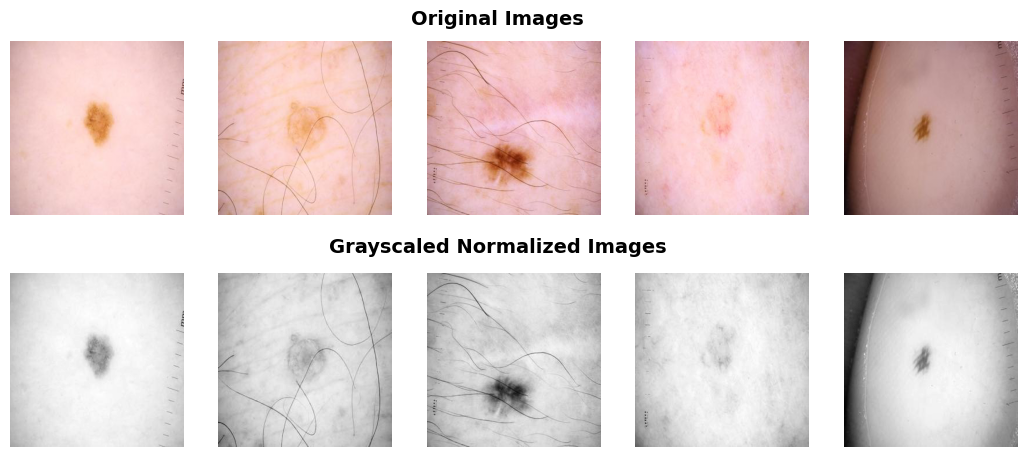

In [45]:
# Function to display original and normalized images in pairs
def display_original_and_normalized_images(original_dir, normalized_dir, num_images=5):
    # Get a list of images in the original and normalized directories
    original_images = os.listdir(original_dir)[:num_images]
    normalized_images = os.listdir(normalized_dir)[:num_images]
    
    # Set up the plot
    fig, axes = plt.subplots(2, num_images, figsize=(13, 6))

    # Loop through the images and display them in pairs
    for i in range(num_images):
        original_img_path = os.path.join(original_dir, original_images[i])
        normalized_img_path = os.path.join(normalized_dir, normalized_images[i])
        
        # Load the images
        original_img = Image.open(original_img_path)
        normalized_img = Image.open(normalized_img_path)

        # Convert to numpy array and normalize the image to 0-1 range
        original_img_np = np.array(original_img) / 255.0
        normalized_img_np = np.array(normalized_img) / 255.0
        
        # Display the original image
        axes[0, i].imshow(original_img_np, cmap='gray')  
        axes[0, i].axis('off')

        # Display the normalized image
        axes[1, i].imshow(normalized_img_np, cmap='gray') 
        axes[1, i].axis('off')

    # Center the headings without disrupting the layout
    fig.subplots_adjust(top=0.92, bottom=0.21)  
    plt.figtext(0.5, 0.93, 'Original Images', ha='center', fontsize=14, fontweight='bold')
    plt.figtext(0.5, 0.55, 'Grayscaled Normalized Images', ha='center', fontsize=14, fontweight='bold')

    # Display the images
    plt.show()

# Display 5 original and normalized images
display_original_and_normalized_images(
    r'E:\datasets\melanoma_cancer_dataset\train\benign', 
    r'E:\Grayscale_Normalized_images\Grayscaled_Normalized_Training\benign_train', 
    num_images=5
)

- #### **Original and grayscale normalized images were compared to visualize the conversion process for model preparation.**

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Data Augmentation</h2>

- #### **Data augmentation expands the dataset by applying random transformations to images, improving model generalization.**

In [7]:
# Function to perform data augmentation
def augment_images(input_dir, output_dir, augment_count=5):
    # ImageDataGenerator with various augmentation settings
    datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.15,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Process each image in the input directory
    for filename in os.listdir(input_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(input_dir, filename)
            img = Image.open(img_path).convert('L')
            img_array = np.expand_dims(np.array(img) / 255.0, axis=(0, -1)) 
            
            # Generate augmented images
            i = 0
            for batch in datagen.flow(img_array, batch_size=1):
                augmented_img = Image.fromarray((batch[0].squeeze() * 255).astype(np.uint8), 'L')
                augmented_img.save(os.path.join(output_dir, f"aug_{i}_{filename}"))
                i += 1
                if i >= augment_count:  
                    break

    print(f"Augmentation completed for images in {input_dir}.")

# Paths for benign and malignant training data
benign_train_dir = r'E:\Grayscale_Normalized_images\Grayscaled_Normalized_Training\benign_train'
malignant_train_dir = r'E:\Grayscale_Normalized_images\Grayscaled_Normalized_Training\malignant_train'

# Output directories for augmented images
augmented_benign_dir = r'E:\Augmented_images\Augmented_Training\benign_train'
augmented_malignant_dir = r'E:\Augmented_images\Augmented_Training\malignant_train'

# Perform augmentation on benign and malignant training datasets
augment_images(benign_train_dir, augmented_benign_dir, augment_count=5)
augment_images(malignant_train_dir, augmented_malignant_dir, augment_count=5)

print("Data augmentation completed for the training dataset.")

Augmentation completed for images in E:\Grayscale_Normalized_images\Grayscaled_Normalized_Training\benign_train.
Augmentation completed for images in E:\Grayscale_Normalized_images\Grayscaled_Normalized_Training\malignant_train.
Data augmentation completed for the training dataset.


<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Augmented Images Distribution</h2>

- #### **Augmented Images Distribution shows the count of augmented images in each category and the Overall total.**

In [16]:
# Paths to augmented image directories
benign_augmented_dir = r'E:\Augmented_images\Augmented_Training\benign_train'
malignant_augmented_dir = r'E:\Augmented_images\Augmented_Training\malignant_train'

# Calculate the number of augmented images by counting files in each directory
num_augmented_benign = len(os.listdir(benign_augmented_dir))
num_augmented_malignant = len(os.listdir(malignant_augmented_dir))
total_augmented_images = num_augmented_benign + num_augmented_malignant

# Data for the table
data = {
    "Category": ["Benign", "Malignant", "Total"],
    "Number of Augmented Images": [num_augmented_benign, num_augmented_malignant, total_augmented_images]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Style the table 
styled_table = df.style.set_properties(**{
    'border-color': 'gold',
    'border-width': '2px',
    'border-style': 'solid',
    'color': 'black',
    'font-weight': 'bold',
    'background-color': 'white'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'white'), ('color', 'black'), ('font-weight', 'bold'), ('border-color', 'gold'), ('border-width', '2px'), ('border-style', 'solid')]},
    {'selector': 'td', 'props': [('color', 'black'), ('font-weight', 'bold'), ('border-color', 'gold'), ('border-width', '2px'), ('border-style', 'solid')]}
])

# Display the styled table without the index column
styled_table.hide(axis="index")  # Hide the index column (0, 1, 2, 3)

# Display the table
styled_table

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Visualization of Original, Grayscale, and Augmented Images</h2>

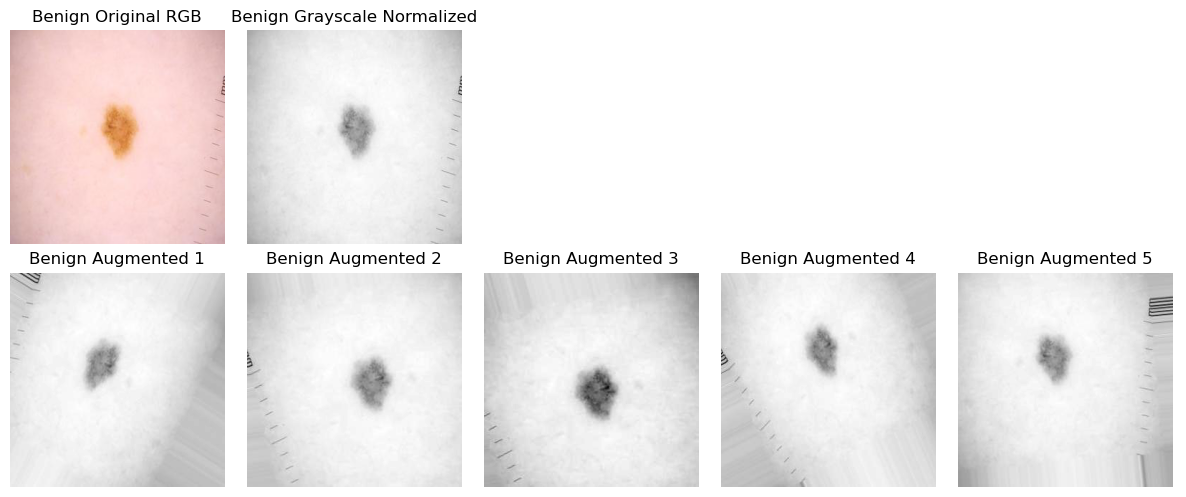

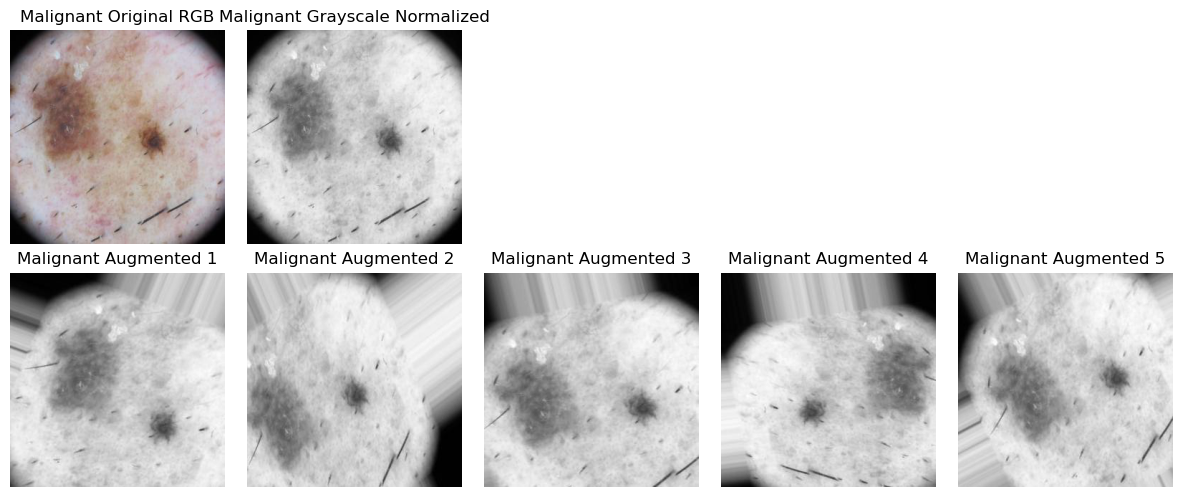

In [39]:
# Paths for original RGB, Grayscale Normalized, and Augmented images

benign_rgb_dir = r'E:\datasets\melanoma_cancer_dataset\train\benign'
malignant_rgb_dir = r'E:\datasets\melanoma_cancer_dataset\train\malignant'
benign_grayscale_dir = r'E:\Grayscale_Normalized_images\Grayscaled_Normalized_Training\benign_train'
malignant_grayscale_dir = r'E:\Grayscale_Normalized_images\Grayscaled_Normalized_Training\malignant_train'
benign_augmented_dir = r'E:\Augmented_images\Augmented_Training\benign_train'
malignant_augmented_dir = r'E:\Augmented_images\Augmented_Training\malignant_train'

# Function to display the images for one benign and one malignant image
def display_one_image(rgb_dir, grayscale_dir, augmented_dir, label):
    # Select one image from the original RGB folder
    rgb_images = os.listdir(rgb_dir)
    selected_image_name = rgb_images[0]  

    # Corresponding grayscale image path
    grayscale_image_path = os.path.join(grayscale_dir, selected_image_name)
    
    # Corresponding augmented images 
    augmented_images = os.listdir(augmented_dir)
    selected_augmented_images = [img for img in augmented_images if selected_image_name in img][:5]

    # Paths to the selected images
    rgb_image_path = os.path.join(rgb_dir, selected_image_name)

    # Plot the images with headings
    fig, axs = plt.subplots(2, 5, figsize=(12, 5))  

    # Display Original RGB Image with Heading
    axs[0, 0].imshow(Image.open(rgb_image_path))
    axs[0, 0].set_title(f"{label} Original RGB")
    axs[0, 0].axis('off')

    # Display Grayscale Normalized Image with Heading
    axs[0, 1].imshow(Image.open(grayscale_image_path), cmap='gray')
    axs[0, 1].set_title(f"{label} Grayscale Normalized")
    axs[0, 1].axis('off')

    # Display 5 Augmented Images
    for i, aug_img in enumerate(selected_augmented_images):
        aug_img_path = os.path.join(augmented_dir, aug_img)
        axs[1, i].imshow(Image.open(aug_img_path), cmap='gray')
        axs[1, i].set_title(f"{label} Augmented {i+1}")
        axs[1, i].axis('off')

    # Remove empty axes for extra columns (after 5 augmented images)
    for j in range(2, 5):
        axs[0, j].axis('off')  # Top row after the first two images

    plt.tight_layout()
    plt.show()

# Display for Benign
display_one_image(benign_rgb_dir, benign_grayscale_dir, benign_augmented_dir, label="Benign")

# Display for Malignant
display_one_image(malignant_rgb_dir, malignant_grayscale_dir, malignant_augmented_dir, label="Malignant")

### **Insights**
- #### **The visualization of original, grayscale normalized, and augmented images highlights the data preparation for model training.**

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Data Augmentation of RGB Images</h2>

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Paths for original RGB images
benign_train_dir = r'E:\datasets\melanoma_cancer_dataset\train\benign'
malignant_train_dir = r'E:\datasets\melanoma_cancer_dataset\train\malignant'

# Target folders for augmented images
augmented_benign_dir = r'E:\augmented_RGB_images\augmented_RGB_Training\benign_train'
augmented_malignant_dir = r'E:\augmented_RGB_images\augmented_RGB_Training\malignant_train'

# Data augmentation settings
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

def augment_images(source_dir, target_dir, num_augmented=5):
    """Augments images from source_dir and saves them to target_dir."""
    for img_name in os.listdir(source_dir):
        img_path = os.path.join(source_dir, img_name)
        img = load_img(img_path)  # Load image
        img_array = img_to_array(img)  # Convert to numpy array
        img_array = img_array.reshape((1,) + img_array.shape)  # Reshape for augmentation

        aug_count = 0
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=target_dir,
                                  save_prefix=os.path.splitext(img_name)[0], save_format='jpg'):
            aug_count += 1
            if aug_count >= num_augmented:
                break

# Perform augmentation for both categories
print("Starting data augmentation...")
augment_images(benign_train_dir, augmented_benign_dir)
print("Augmentation completed for images in benign")

augment_images(malignant_train_dir, augmented_malignant_dir)
print("Augmentation completed for images in malignant")

print("Data augmentation completed for the training dataset.")

Starting data augmentation...
Augmentation completed for images in benign
Augmentation completed for images in malignant
Data augmentation completed for the training dataset.


<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Class Distribution of Augmented RGB Images</h2>

In [20]:
# Target folders for augmented images
augmented_benign_dir = r'E:\augmented_RGB_images\augmented_RGB_Training\benign_train'
augmented_malignant_dir = r'E:\augmented_RGB_images\augmented_RGB_Training\malignant_train'

def get_class_distribution(directory):
    """Returns the count of images in a directory."""
    return len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

# Get class distribution of augmented images
benign_augmented_count = get_class_distribution(augmented_benign_dir)
malignant_augmented_count = get_class_distribution(augmented_malignant_dir)
total_augmented_count = benign_augmented_count + malignant_augmented_count

# Display class distribution
print("\nClass Distribution of Augmented Images:")
print(f"Augmented Benign Images: {benign_augmented_count}")
print(f"Augmented Malignant Images: {malignant_augmented_count}")
print(f"Total Augmented Images: {total_augmented_count}")


Class Distribution of Augmented Images:
Augmented Benign Images: 24955
Augmented Malignant Images: 22932
Total Augmented Images: 47887


<h1 style="text-align: center; font-weight: bold; text-decoration: underline; background-color: rgba(255, 255, 255, 0.2);">Building the CNN Model</h1>

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Defining Paths</h2>

In [113]:
# Paths to training and testing directories
train_dir = r'E:\datasets\melanoma_cancer_dataset\train'
test_dir = r'E:\datasets\melanoma_cancer_dataset\test'

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Data Generators</h2>

In [115]:
# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10, 
                                   width_shift_range=0.1,
                                   height_shift_range=0.1, 
                                   zoom_range=0.1, 
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)  

# Flowing data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    shuffle=False  
)

Found 9579 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Define the CNN Model</h2>

In [125]:
# Build a lightweight CNN model
model = Sequential([
    Input(shape=(128, 128, 1)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 126, 126, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 63, 63, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,629,633 (6.22 MB)

 Trainable params: 1,629,409 (6.22 MB)

 Non-trainable params: 224 (896.00 B)

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Compile the Model</h2>

In [127]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Train the Model</h2>

In [129]:
# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 227s 740ms/step - accuracy: 0.7910 - loss: 0.4882 - val_accuracy: 0.5005 - val_loss: 1.3762
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 176s 588ms/step - accuracy: 0.8526 - loss: 0.3434 - val_accuracy: 0.8218 - val_loss: 0.5355
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 179s 597ms/step - accuracy: 0.8626 - loss: 0.3281 - val_accuracy: 0.8809 - val_loss: 0.3092
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 176s 585ms/step - accuracy: 0.8630 - loss: 0.3265 - val_accuracy: 0.8939 - val_loss: 0.2830
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 168s 556ms/step - accuracy: 0.8777 - loss: 0.2914 - val_accuracy: 0.8899 - val_loss: 0.3612


<h1 style="text-align: center; font-weight: bold; text-decoration: underline;">Evaluation Metrics of the Model</h1>

<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Model Accuracy and Loss Performance Curve</h3>

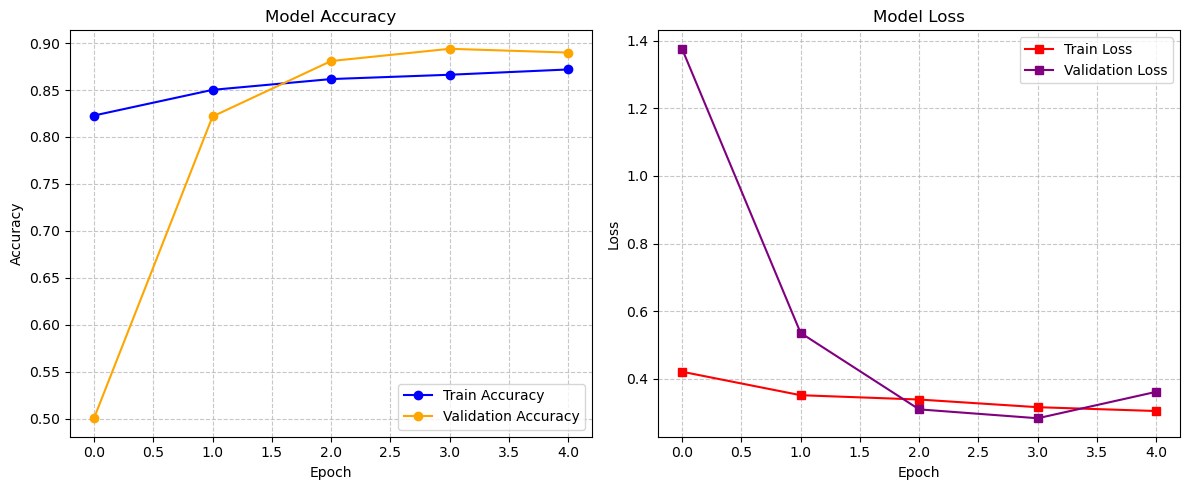

In [138]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

# Plot training & validation accuracy on the first subplot
axes[0].plot(history.history['accuracy'], label='Train Accuracy', color='blue', marker='o')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', marker='o')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='lower right')
axes[0].grid(True, linestyle='--', alpha=0.7)  

# Plot training & validation loss on the second subplot
axes[1].plot(history.history['loss'], label='Train Loss', color='red', marker='s')
axes[1].plot(history.history['val_loss'], label='Validation Loss', color='purple', marker='s')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper right')
axes[1].grid(True, linestyle='--', alpha=0.7)  

plt.tight_layout()
plt.show()

<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Test Accuracy</h3>

In [140]:
# Test accuracy and Test Loss
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.9320 - loss: 0.2317
Test Accuracy: 88.99%
Test Loss: 0.3612


<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Model Predictions</h3>

In [142]:
# Reset the test generator to start from the beginning
test_generator.reset()

# Generate predictions for the test set
predictions = (model.predict(test_generator) > 0.5).astype(int).flatten()
print("Predictions: [", ", ".join(map(str, predictions[:20])), ", ... ]")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step
Predictions: [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , ... ]


<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Confusion Matrix</h3>

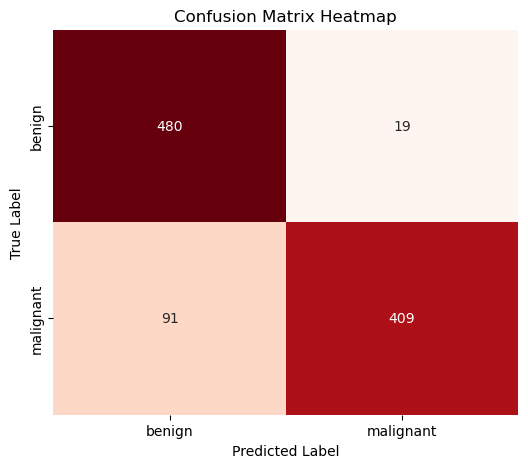

In [144]:
# Obtain the true classes from the test generator
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predictions)

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=class_labels, yticklabels=class_labels) 
        
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Classification Report</h3>

In [147]:
# Print the classification report
print("Classification Report:")
print(classification_report(true_classes, predictions, target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

      benign       0.84      0.96      0.90       499
   malignant       0.96      0.82      0.88       500

    accuracy                           0.89       999
   macro avg       0.90      0.89      0.89       999
weighted avg       0.90      0.89      0.89       999



<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">ROC Curve</h3>

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step


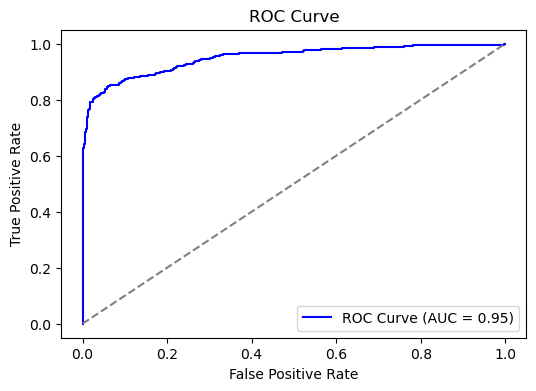

In [149]:
# Get predicted probabilities for the ROC curve
y_pred_prob = model.predict(test_generator)  # This returns probabilities
y_pred_prob = y_pred_prob.ravel()  # Flatten to 1D array

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(true_classes, y_pred_prob)

# Calculate the AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

<h2 style="text-align: center; font-weight: bold; text-decoration: underline; background-color: rgba(255, 255, 255, 0.2);">Building the CNN Model with Grayscaled Normalized images</h2>

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Defining Paths and Data Generators</h2>

In [91]:
# Paths to training and testing directories
train_dir = r'E:/Grayscale_Normalized_images/Grayscaled_Normalized_Training'
test_dir = r'E:/Grayscale_Normalized_images/Grayscaled_Normalized_Testing'

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10, 
                                   width_shift_range=0.1,
                                   height_shift_range=0.1, 
                                   zoom_range=0.1, 
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)  

# Flowing data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    shuffle=False  
)

Found 9579 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Define the CNN Model</h2>

In [93]:
# Build an enhanced CNN model
model = Sequential([
    Input(shape=(128, 128, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  
    Dense(1, activation='sigmoid')
])

# Display model summary
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 63, 63, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,516,609 (24.86 MB)

 Trainable params: 6,516,161 (24.86 MB)

 Non-trainable params: 448 (1.75 KB)

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Compile the Model</h2>

In [95]:
# Compile the model 
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Train the Model</h2>

In [99]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 373s 1s/step - accuracy: 0.8039 - loss: 0.6251 - val_accuracy: 0.5025 - val_loss: 1.2830
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 371s 1s/step - accuracy: 0.8329 - loss: 0.5117 - val_accuracy: 0.7898 - val_loss: 0.5569
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 401s 1s/step - accuracy: 0.8472 - loss: 0.4155 - val_accuracy: 0.8879 - val_loss: 0.3174
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 421s 1s/step - accuracy: 0.8650 - loss: 0.3580 - val_accuracy: 0.8739 - val_loss: 0.3561
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 520s 2s/step - accuracy: 0.8678 - loss: 0.3570 - val_accuracy: 0.8879 - val_loss: 0.3911
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 464s 2s/step - accuracy: 0.8805 - loss: 0.3260 - val_accuracy: 0.8929 - val_loss: 0.3302
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 372s 1s/step - accuracy: 0.8792 - loss: 0.3003 - val_accuracy: 0.8909 - val_loss: 0.2940
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 371s 1s/step - accuracy: 0.8824 - loss: 0.3121 - val_accu

<h1 style="text-align: center; font-weight: bold; text-decoration: underline;">Evaluation Metrics of the Model</h1>

<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Model Accuracy and Loss Performance Curve</h3>

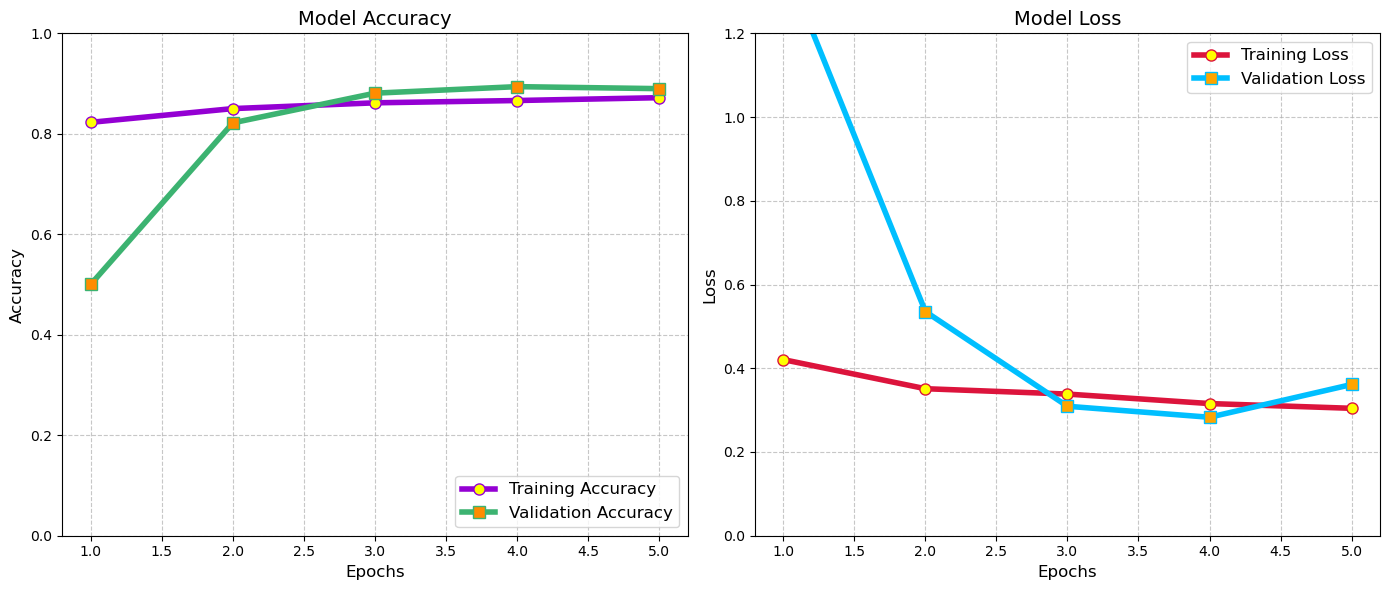

In [167]:
# Extract accuracy and loss from the training history
history_accuracy = history.history['accuracy']
history_loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(1, len(history_accuracy) + 1)

# Create a larger figure with a grid layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot Model Accuracy 
ax1.plot(epochs, history_accuracy, color='darkviolet', label='Training Accuracy', linewidth=4, marker='o', markersize=8, markerfacecolor='yellow')
ax1.plot(epochs, val_accuracy, color='mediumseagreen', label='Validation Accuracy', linewidth=4, marker='s', markersize=8, markerfacecolor='darkorange')
ax1.set_title('Model Accuracy', fontsize=14)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_ylim([0, 1])  
ax1.legend(loc='lower right', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot Model Loss 
ax2.plot(epochs, history_loss, color='crimson', label='Training Loss', linewidth=4, marker='o', markersize=8, markerfacecolor='yellow')
ax2.plot(epochs, val_loss, color='deepskyblue', label='Validation Loss', linewidth=4, marker='s', markersize=8, markerfacecolor='orange')
ax2.set_title('Model Loss', fontsize=14)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_ylim([0, 1.2])  
ax2.legend(loc='upper right', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)

# display the plots
plt.tight_layout()
plt.show()

<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Test Accuracy and Test Loss</h3>

In [101]:
# Test accuracy and Test Loss
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 182ms/step - accuracy: 0.9302 - loss: 0.2494
Test Accuracy: 89.39%
Test Loss: 0.3577


<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Model Predictions</h3>

In [135]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Reset test generator and get predictions
test_generator.reset()
predictions = (model.predict(test_generator) > 0.5).astype(int).flatten()

print("Predictions: [", ", ".join(map(str, predictions[:20])), ", ... ]")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step
Predictions: [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , ... ]


<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Confusion Matrix</h3>

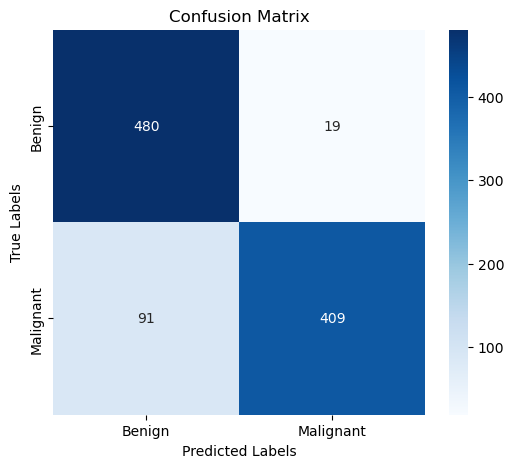

In [174]:
conf_matrix = confusion_matrix(true_classes, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Classification Report</h3>

In [107]:
print("Classification Report:")
print(classification_report(true_classes, predictions, target_names=class_labels))

Classification Report:
                precision    recall  f1-score   support

   benign_test       0.85      0.96      0.90       499
malignant_test       0.95      0.83      0.89       500

      accuracy                           0.89       999
     macro avg       0.90      0.89      0.89       999
  weighted avg       0.90      0.89      0.89       999



<h3 style="text-align: center; font-weight: bold; text-decoration: underline; background-color: rgba(255, 255, 255, 0.2);">Building the CNN Model with Grayscaled Normalized and Augmented images</h3>

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Set Paths and Data Generators</h2>

In [27]:
# Define paths to directories
train_dir_normalized = r'E:\Grayscale_Normalized_images\Grayscaled_Normalized_Training'
test_dir_normalized = r'E:\Grayscale_Normalized_images\Grayscaled_Normalized_Testing'
train_dir_augmented = r'E:\Augmented_images\Augmented_Training'

# Define ImageDataGenerator for preprocessing and augmentation
train_gen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values between 0 and 1
    rotation_range=20,  # Random rotations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True  # Random horizontal flip
)

test_gen = ImageDataGenerator(rescale=1./255)

# Load training and test data
train_data = train_gen.flow_from_directory(train_dir_normalized, target_size=(64, 64), batch_size=32, class_mode='binary')
test_data = test_gen.flow_from_directory(test_dir_normalized, target_size=(64, 64), batch_size=32, class_mode='binary', shuffle=False)

Found 9579 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Define the CNN Model</h2>

In [32]:
# Define CNN model
model = tf.keras.Sequential([
    Input(shape=(64, 64, 3)),
    # 1st Convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # 2nd Convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Flatten the output of the convolutional layers
    tf.keras.layers.Flatten(),
    
    # Dense layer
    tf.keras.layers.Dense(128, activation='relu'),
    
    # Dropout layer to prevent overfitting
    tf.keras.layers.Dropout(0.5),
    
    # Output layer for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Compile the Model</h2>

In [36]:
# Compile the model with Adam optimizer and binary cross-entropy loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Train the Model</h2>

In [40]:
# Train the model
history = model.fit(
    train_data,
    epochs=15, 
    validation_data=test_data
)

Epoch 1/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 257s 858ms/step - accuracy: 0.6903 - loss: 0.5726 - val_accuracy: 0.8519 - val_loss: 0.3317
Epoch 2/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 90s 299ms/step - accuracy: 0.7929 - loss: 0.4087 - val_accuracy: 0.8599 - val_loss: 0.3125
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 87s 288ms/step - accuracy: 0.8080 - loss: 0.4002 - val_accuracy: 0.8739 - val_loss: 0.2836
Epoch 4/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 83s 276ms/step - accuracy: 0.8287 - loss: 0.3680 - val_accuracy: 0.8769 - val_loss: 0.2955
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 274ms/step - accuracy: 0.8411 - loss: 0.3483 - val_accuracy: 0.8739 - val_loss: 0.2769
Epoch 6/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 84s 278ms/step - accuracy: 0.8367 - loss: 0.3599 - val_accuracy: 0.8318 - val_loss: 0.3233
Epoch 7/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 273ms/step - accuracy: 0.8430 - loss: 0.3450 - val_accuracy: 0.8849 - val_loss: 0.2637
Epoch 8/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 85s 285ms/step - accuracy: 0.8515 - loss: 

<h1 style="text-align: center; font-weight: bold; text-decoration: underline;">Evaluation Metrics of the Model</h1>

<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Test Accuracy and Test Loss</h3>

In [42]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8891 - loss: 0.2547
Test Loss: 0.2638322710990906
Test Accuracy: 0.8778778910636902


<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Model Predictions</h3>

In [44]:
# True labels
true_labels = test_data.classes

# Get model predictions on the test data
test_preds = model.predict(test_data)
test_preds = (test_preds > 0.5).astype(int)  # Convert probabilities to binary values

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step


<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Confusion Matrix</h3>

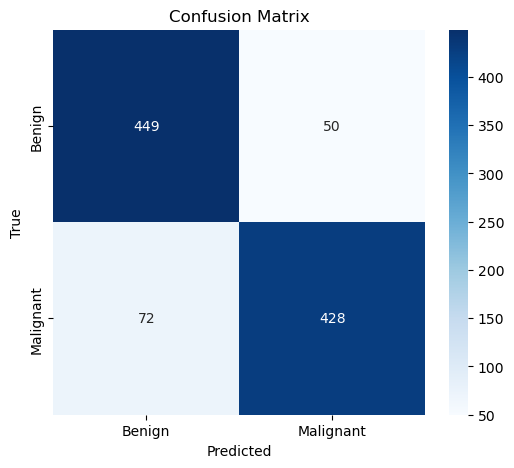

In [46]:
# Generate confusion matrix
cm = confusion_matrix(true_labels, test_preds)
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Classification Report</h3>

In [48]:
# Generate classification report
report = classification_report(true_labels, test_preds)

# Print classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       499
           1       0.90      0.86      0.88       500

    accuracy                           0.88       999
   macro avg       0.88      0.88      0.88       999
weighted avg       0.88      0.88      0.88       999



<h2 style="text-align: center; font-weight: bold; text-decoration: underline; background-color: rgba(255, 255, 255, 0.2);">Building the CNN Model with RGB Augmented images</h2>

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Set Paths and Data Generators</h2>

In [ ]:
# Paths to datasets
train_dir = r'E:\augmented_RGB_images\augmented_RGB_Training'
test_dir = r'E:\datasets\melanoma_cancer_dataset\test'

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10, 
                                   width_shift_range=0.1,
                                   height_shift_range=0.1, 
                                   zoom_range=0.1, 
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)  

# Flowing data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False  
)

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Define the CNN Model</h2>

In [31]:
# Build an enhanced CNN model
model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  
    Dense(1, activation='sigmoid')
])

# Display model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 63, 63, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,517,185 (24.86 MB)

 Trainable params: 6,516,737 (24.86 MB)

 Non-trainable params: 448 (1.75 KB)

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Compile the Model</h2>

In [33]:
# Compile the model 
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Train the Model</h2>

In [35]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 2162s 1s/step - accuracy: 0.8531 - loss: 0.4578 - val_accuracy: 0.8979 - val_loss: 0.2985
Epoch 2/10
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 2102s 1s/step - accuracy: 0.8994 - loss: 0.2627 - val_accuracy: 0.8909 - val_loss: 0.2592
Epoch 3/10
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 2091s 1s/step - accuracy: 0.9075 - loss: 0.2369 - val_accuracy: 0.8108 - val_loss: 0.4297
Epoch 4/10
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 2098s 1s/step - accuracy: 0.9126 - loss: 0.2254 - val_accuracy: 0.8719 - val_loss: 0.3943
Epoch 5/10
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 2103s 1s/step - accuracy: 0.9174 - loss: 0.2116 - val_accuracy: 0.8849 - val_loss: 0.2994
Epoch 6/10
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 2108s 1s/step - accuracy: 0.9188 - loss: 0.2031 - val_accuracy: 0.9039 - val_loss: 0.2909
Epoch 7/10
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 2107s 1s/step - accuracy: 0.9226 - loss: 0.1967 - val_accuracy: 0.9029 - val_loss: 0.2622
Epoch 8/10
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 2109s 1s/step - accuracy: 0.9285 -

<h1 style="text-align: center; font-weight: bold; text-decoration: underline;">Evaluation Metrics of the Model</h1>

<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Model Accuracy and Loss Performance Curve</h3>

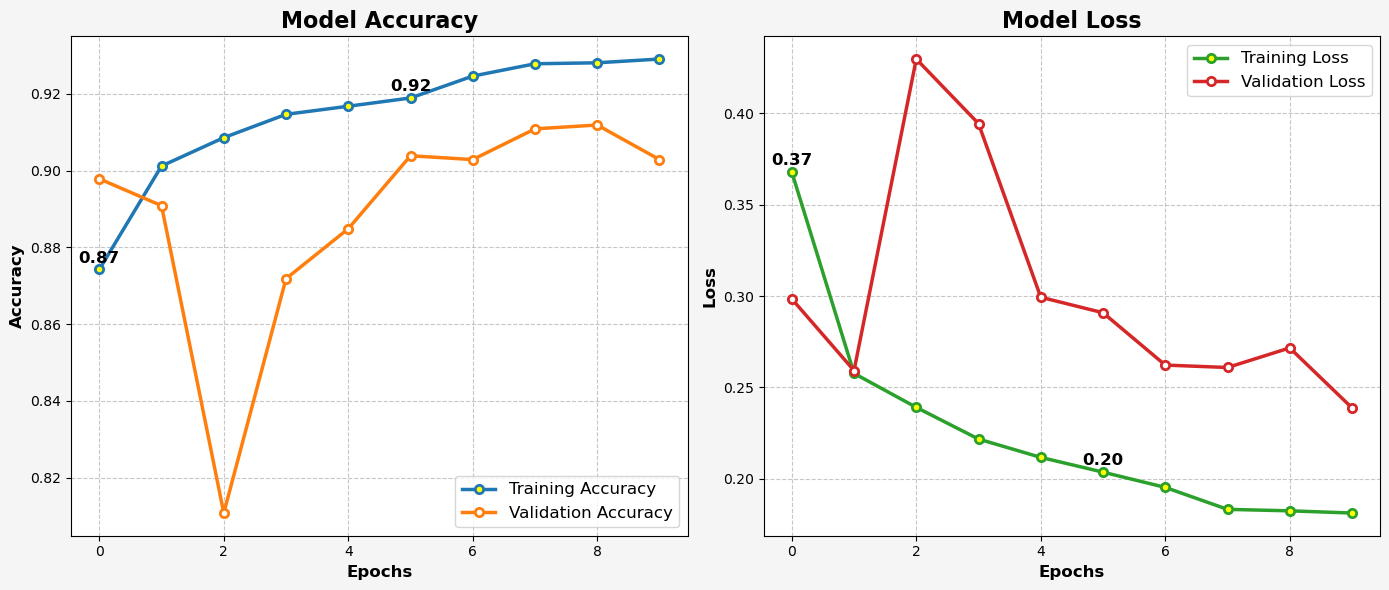

In [49]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Define custom colors for the plots
train_acc_color = '#1f77b4'  # Blue
val_acc_color = '#ff7f0e'    # Orange
train_loss_color = '#2ca02c' # Green
val_loss_color = '#d62728'   # red

# Plot model accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', color=train_acc_color, linewidth=2.5, marker='o', markersize=6, markerfacecolor='yellow', markeredgewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color=val_acc_color, linewidth=2.5, marker='o', markersize=6, markerfacecolor='white', markeredgewidth=2)
axes[0].set_title('Model Accuracy', fontsize=16, fontweight='bold', color='black')
axes[0].set_xlabel('Epochs', fontsize=12, fontweight='bold', color='black')
axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold', color='black')
axes[0].tick_params(axis='both', which='major', labelsize=10, labelcolor='black')
axes[0].legend(loc='lower right', fontsize=12)

# Adding annotations for accuracy plot
for i in range(0, len(history.history['accuracy']), 5):  # Annotate every 5th point
    axes[0].annotate(f"{history.history['accuracy'][i]:.2f}", 
                     (i, history.history['accuracy'][i]), 
                     textcoords="offset points", 
                     xytext=(0, 5), 
                     ha='center', fontsize=12, color='black', fontweight='bold')

# Plot model loss
axes[1].plot(history.history['loss'], label='Training Loss', color=train_loss_color, linewidth=2.5, marker='o', markersize=6, markerfacecolor='yellow', markeredgewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', color=val_loss_color, linewidth=2.5, marker='o', markersize=6, markerfacecolor='white', markeredgewidth=2)
axes[1].set_title('Model Loss', fontsize=16, fontweight='bold', color='black')
axes[1].set_xlabel('Epochs', fontsize=12, fontweight='bold', color='black')
axes[1].set_ylabel('Loss', fontsize=12, fontweight='bold', color='black')
axes[1].tick_params(axis='both', which='major', labelsize=10, labelcolor='black')
axes[1].legend(loc='upper right', fontsize=12)

# Adding annotations for loss plot
for i in range(0, len(history.history['loss']), 5):  # Annotate every 5th point
    axes[1].annotate(f"{history.history['loss'][i]:.2f}", 
                     (i, history.history['loss'][i]), 
                     textcoords="offset points", 
                     xytext=(0, 5), 
                     ha='center', fontsize=12, color='black', fontweight='bold')

# Set background color and grid
fig.patch.set_facecolor('#f5f5f5')  # Set the background color to light gray
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[1].grid(True, linestyle='--', alpha=0.7)

# Show the plots
plt.tight_layout()
plt.show()

<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Test Accuracy</h3>

In [37]:
# Test accuracy and Test Loss
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step - accuracy: 0.9225 - loss: 0.2103
Test Accuracy: 90.29%
Test Loss: 0.2388


<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Model Predictions</h3>

In [39]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Reset test generator and get predictions
test_generator.reset()
predictions = (model.predict(test_generator) > 0.5).astype(int).flatten()

print("Predictions: [", ", ".join(map(str, predictions[:20])), ", ... ]")

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 211ms/step
Predictions: [ 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , ... ]


<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Visualization of Confusion Matrix</h3>

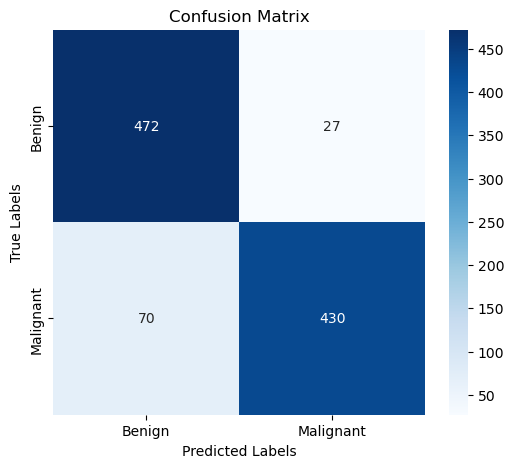

In [41]:
conf_matrix = confusion_matrix(true_classes, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Classification Report</h3>

In [43]:
print("Classification Report:")
print(classification_report(true_classes, predictions, target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

      benign       0.87      0.95      0.91       499
   malignant       0.94      0.86      0.90       500

    accuracy                           0.90       999
   macro avg       0.91      0.90      0.90       999
weighted avg       0.91      0.90      0.90       999



<h1 style="text-align: center; font-weight: bold; text-decoration: underline; background-color: rgba(255, 255, 255, 0.2);">VGG-16 Model on RGB Augmented Images</h1>

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Define the paths</h2>

In [4]:
# Paths to datasets
train_dir = r'E:\augmented_RGB_images\augmented_RGB_Training'
test_dir = r'E:\datasets\melanoma_cancer_dataset\test'

# Constants
IMG_SIZE = (32, 32)  # Reduce input size for faster computation
BATCH_SIZE = 32
EPOCHS = 5

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Data Generators</h2>

In [6]:
#Rescaling for Training
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Rescaling for Testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Training Data Generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Validation Data Generator
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Testing Data Generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 38310 images belonging to 2 classes.
Found 9577 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">VGG-16 Model on RGB Augmented Images</h2>

In [10]:
from tensorflow.keras.applications import VGG16
# Load VGG-16 (pre-trained on ImageNet)
base_model = VGG16(
    weights='imagenet', 
    include_top=False,  
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
)

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [12]:
# Add custom layers on top of VGG-16
model = Sequential([
    base_model,                # VGG-16 base
    Flatten(),                 # Flatten the output of the convolutional base
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.5),              # Dropout to prevent overfitting
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the Model
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,780,481 (56.38 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Train the Model</h2>

In [16]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    
)

Epoch 1/5
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 1462s 1s/step - accuracy: 0.8299 - loss: 0.3761 - val_accuracy: 0.8530 - val_loss: 0.3216
Epoch 2/5
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 952s 795ms/step - accuracy: 0.8702 - loss: 0.3004 - val_accuracy: 0.8586 - val_loss: 0.3157
Epoch 3/5
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 953s 796ms/step - accuracy: 0.8822 - loss: 0.2775 - val_accuracy: 0.8718 - val_loss: 0.2892
Epoch 4/5
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 955s 798ms/step - accuracy: 0.8857 - loss: 0.2675 - val_accuracy: 0.8756 - val_loss: 0.2823
Epoch 5/5
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 956s 798ms/step - accuracy: 0.8900 - loss: 0.2557 - val_accuracy: 0.8726 - val_loss: 0.2889


<h1 style="text-align: center; font-weight: bold; text-decoration: underline;">Evaluation Metrics of the Model</h1>

<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Test Accuracy and Test Loss</h3>

In [18]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 802ms/step - accuracy: 0.8712 - loss: 0.2751
Test Accuracy: 88.59%
Test Loss: 0.2561


<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Model Predictions</h3>

In [20]:
# Predict on the test data
predictions = (model.predict(test_generator) > 0.5).astype('int32')

# True labels from the test data generator
true_labels = test_generator.classes

32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 634ms/step


<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Confusion Matrix</h3>

In [22]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(true_labels, predictions))

Confusion Matrix:
 [[436  63]
 [ 51 449]]


<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Visualization of Confusion Matrix</h3>

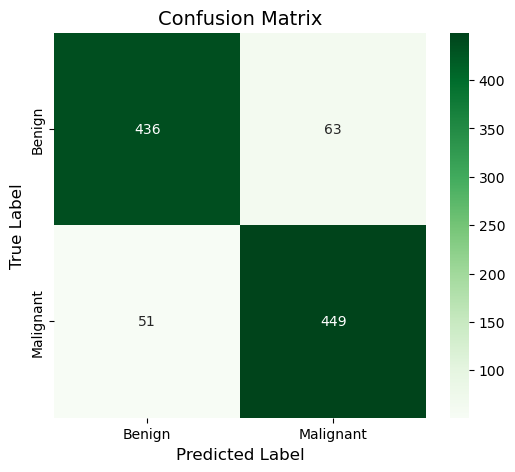

In [76]:
# Confusion matrix values
confusion_matrix = np.array([[436, 63],
                             [51, 449]])

# Define class labels
class_names = ['Benign', 'Malignant']

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)

# Add labels, title, and axis ticks
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.show()

<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Classification Report</h3>

In [24]:
# Classification Report
print("Classification Report:\n", classification_report(true_labels, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       499
           1       0.88      0.90      0.89       500

    accuracy                           0.89       999
   macro avg       0.89      0.89      0.89       999
weighted avg       0.89      0.89      0.89       999



<h1 style="text-align: center; font-weight: bold; text-decoration: underline; background-color: rgba(255, 255, 255, 0.2);">VGG-19 Model on RGB Augmented Images</h1>

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Set Paths and Data Generators</h2>

In [27]:
# Paths
train_dir = r'E:\augmented_RGB_images\augmented_RGB_Training'
test_dir = r'E:\datasets\melanoma_cancer_dataset\test'

# Image dimensions and batch size
img_height, img_width = 32, 32  # Reduced size for faster execution
batch_size = 16

# Data generators for rescaling
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='binary', color_mode='rgb'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='binary', color_mode='rgb', shuffle=False
)

Found 47887 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Define the VGG-19 Model</h2>

In [29]:
# Load VGG-19 pre-trained model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze all layers in the base model to use it as a feature extractor
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 1, 1, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,040,833 (76.45 MB)

 Trainable params: 16,449 (64.25 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Compile the Model</h2>

In [31]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Train the Model</h2>

In [35]:
# Train the model for minimal epochs
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

Epoch 1/5
2993/2993 ━━━━━━━━━━━━━━━━━━━━ 1411s 471ms/step - accuracy: 0.8265 - loss: 0.3873 - val_accuracy: 0.8849 - val_loss: 0.2666
Epoch 2/5
2993/2993 ━━━━━━━━━━━━━━━━━━━━ 1404s 469ms/step - accuracy: 0.8719 - loss: 0.3045 - val_accuracy: 0.8739 - val_loss: 0.2613
Epoch 3/5
2993/2993 ━━━━━━━━━━━━━━━━━━━━ 1371s 458ms/step - accuracy: 0.8760 - loss: 0.2945 - val_accuracy: 0.8879 - val_loss: 0.2534
Epoch 4/5
2993/2993 ━━━━━━━━━━━━━━━━━━━━ 1419s 474ms/step - accuracy: 0.8768 - loss: 0.2879 - val_accuracy: 0.8609 - val_loss: 0.2814
Epoch 5/5
2993/2993 ━━━━━━━━━━━━━━━━━━━━ 1420s 474ms/step - accuracy: 0.8814 - loss: 0.2824 - val_accuracy: 0.8829 - val_loss: 0.2616


<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Test Accuracy and Test Loss</h3>

In [42]:
# Evaluate model on test data
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 428ms/step - accuracy: 0.9066 - loss: 0.2296
Test Accuracy: 88.29%
Test Loss: 0.2616


<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Model Predictions</h3>

In [44]:
# Predict on test data
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 446ms/step


<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Confusion Matrix</h3>

In [46]:
# Generate metrics
y_true = test_generator.classes
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

Confusion Matrix:
[[461  38]
 [ 79 421]]


<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Visualization of Confusion Matrix</h3>

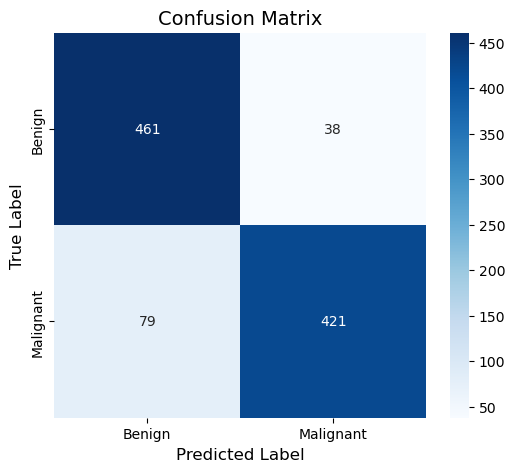

In [80]:
confusion_matrix = np.array([[461, 38],
                             [79, 421]])

# Define class labels
class_names = ['Benign', 'Malignant']

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels, title, and axis ticks
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.show()

<h3 style="text-align: left; font-weight: bold; text-decoration: underline;">Classification Report</h3>

In [50]:
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       499
           1       0.92      0.84      0.88       500

    accuracy                           0.88       999
   macro avg       0.89      0.88      0.88       999
weighted avg       0.89      0.88      0.88       999



<h1 style="text-align: center; font-weight: bold; text-decoration: underline; background-color: rgba(255, 255, 255, 0.2);">Comparison of Model Accuracies</h1>


In [71]:
from IPython.display import display, HTML

# Define model names, test accuracies, F1 scores of benign and malignant models
data = {
    "Model Name": [
        "CNN Model on RGB Images",
        "CNN Model on Grayscaled Normalized Images",
        "CNN Model on Grayscaled Normalized Augmented Images",
        "CNN Model on RGB Augmented Images",
        "VGG-16 Model on RGB Augmented Images",
        "VGG-19 Model on RGB Augmented Images"
    ],
    "Test Accuracy (%)": ["88.99%", "89.39%", "87.79%", "90.29%", "88.59%", "88.29%"],
    "F1 Score of Benign": [90, 90, 88, 91, 88, 89],
    "F1 Score of Malignant": [88, 89, 88, 90, 89, 88]
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Add a new column for serial numbers starting from 1
df.insert(0, "Serial Number", range(1, len(df) + 1))

# Style the DataFrame
styled_table = df.style.set_table_styles([
    {'selector': 'th', 'props': [
        ('background-color', '#FFD700'),  # Gold background for header
        ('color', 'black'),               # Bold black text
        ('font-weight', 'bold'),
        ('border', '2px solid black'),
        ('text-align', 'center'),
        ('font-size', '14px')             # Make the header text larger and bold
    ]},
    {'selector': 'th.col_heading.level0:nth-child(2)', 'props': [
        ('font-weight', 'bold'),          # Extra bold for "Model Name"
        ('text-align', 'center')
    ]},
    {'selector': 'td', 'props': [
        ('background-color', 'white'),    # White background for table cells
        ('color', 'black'),
        ('font-weight', 'bold'),
        ('border', '2px solid black'),
        ('text-align', 'center')          # Center-align cell text
    ]}
]).set_properties(**{'text-align': 'center'})  # Ensure alignment across all text

# Remove the default index from the display
styled_table = styled_table.hide(axis="index")

# Display the styled table with a title
display(HTML('<h3 style="background-color:#ADD8E6; color:black; font-weight:bold; padding:10px;">Model Performance Summary</h3>'))
display(styled_table)

- #### **Among the six models developed, the CNN model trained on RGB-augmented images achieved the highest test accuracy of 90.29%. Based on this performance, it has been finalized as the best model for skin cancer detection.**

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Confusion Matrix of RGB Augmented Images</h2>

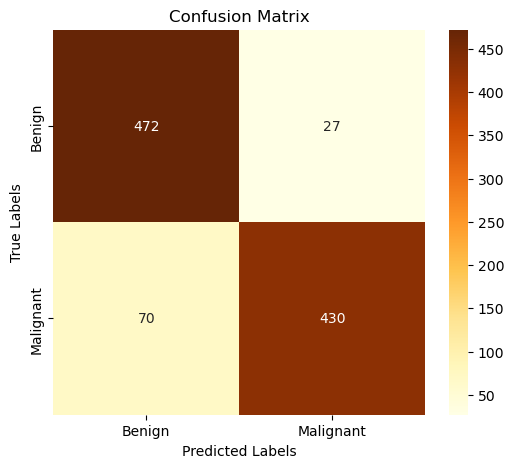

In [66]:
conf_matrix = confusion_matrix(true_classes, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Model Accuracy and Loss Performance Curve</h2>

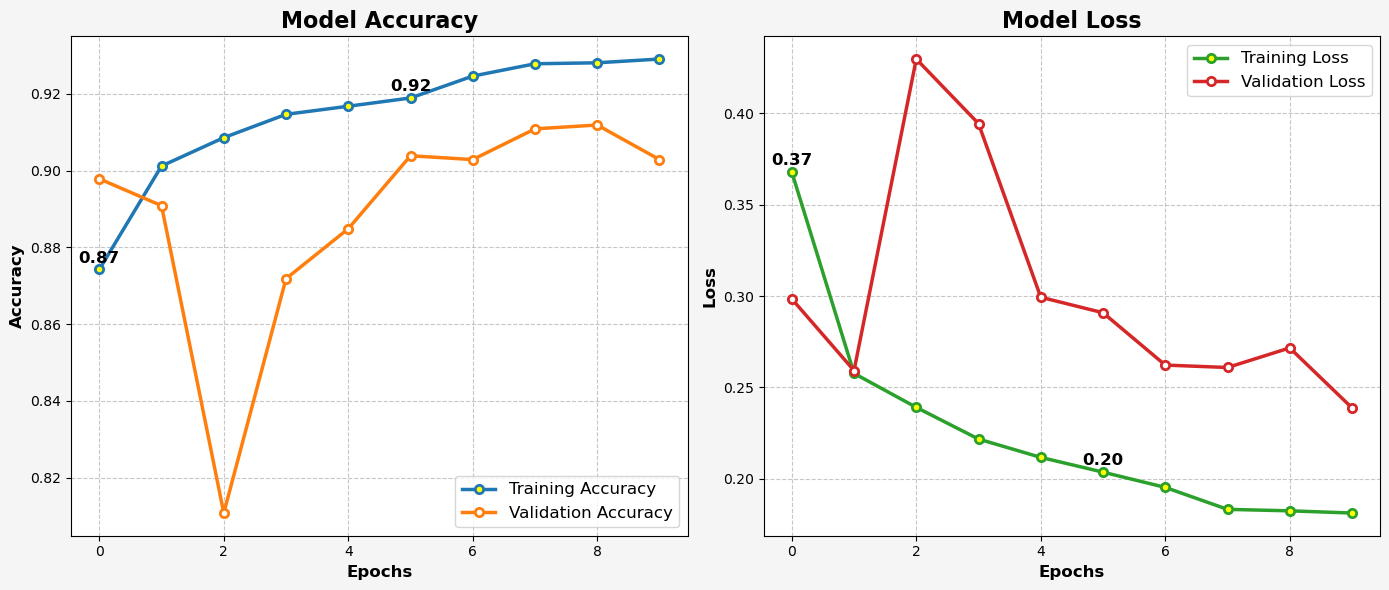

In [59]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Define custom colors for the plots
train_acc_color = '#1f77b4'  # Blue
val_acc_color = '#ff7f0e'    # Orange
train_loss_color = '#2ca02c' # Green
val_loss_color = '#d62728'   # red

# Plot model accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', color=train_acc_color, linewidth=2.5, marker='o', markersize=6, markerfacecolor='yellow', markeredgewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color=val_acc_color, linewidth=2.5, marker='o', markersize=6, markerfacecolor='white', markeredgewidth=2)
axes[0].set_title('Model Accuracy', fontsize=16, fontweight='bold', color='black')
axes[0].set_xlabel('Epochs', fontsize=12, fontweight='bold', color='black')
axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold', color='black')
axes[0].tick_params(axis='both', which='major', labelsize=10, labelcolor='black')
axes[0].legend(loc='lower right', fontsize=12)

# Adding annotations for accuracy plot
for i in range(0, len(history.history['accuracy']), 5):  # Annotate every 5th point
    axes[0].annotate(f"{history.history['accuracy'][i]:.2f}", 
                     (i, history.history['accuracy'][i]), 
                     textcoords="offset points", 
                     xytext=(0, 5), 
                     ha='center', fontsize=12, color='black', fontweight='bold')

# Plot model loss
axes[1].plot(history.history['loss'], label='Training Loss', color=train_loss_color, linewidth=2.5, marker='o', markersize=6, markerfacecolor='yellow', markeredgewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', color=val_loss_color, linewidth=2.5, marker='o', markersize=6, markerfacecolor='white', markeredgewidth=2)
axes[1].set_title('Model Loss', fontsize=16, fontweight='bold', color='black')
axes[1].set_xlabel('Epochs', fontsize=12, fontweight='bold', color='black')
axes[1].set_ylabel('Loss', fontsize=12, fontweight='bold', color='black')
axes[1].tick_params(axis='both', which='major', labelsize=10, labelcolor='black')
axes[1].legend(loc='upper right', fontsize=12)

# Adding annotations for loss plot
for i in range(0, len(history.history['loss']), 5):  # Annotate every 5th point
    axes[1].annotate(f"{history.history['loss'][i]:.2f}", 
                     (i, history.history['loss'][i]), 
                     textcoords="offset points", 
                     xytext=(0, 5), 
                     ha='center', fontsize=12, color='black', fontweight='bold')

# Set background color and grid
fig.patch.set_facecolor('#f5f5f5')  # Set the background color to light gray
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[1].grid(True, linestyle='--', alpha=0.7)

# Show the plots
plt.tight_layout()
plt.show()

<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Save the Model</h2>

In [45]:
# Save the trained model
model.save('E:/Saved_model/Melanoma_detection_model.keras')

print("Model saved successfully!")

Model saved successfully!


<h2 style="text-align: center; font-weight: bold; text-decoration: underline;">Summary</h2>

- #### After evaluating six models, the CNN model trained on RGB augmented images was chosen for its superior accuracy.
- #### This model demonstrated the best performance in dataset classification, making it the optimal choice.
- #### In conclusion, the finalized model has been saved for deployment, ensuring reliable and efficient real-world predictions.